<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">INFO</h1>

In this script, we compare players `Exhaustive`, `Greedy`,`Back_tracking` in a game where there is only one cheese to catch in a maze without mud. \
All programs are evaluated on the same game configurations. \
We do not show the game interface here, to make the script faster. \
The goal is to compare the time needed in preprocessing for the different players in the same conditions.

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">IMPORTS</h1>

In [ ]:
# External imports
import sys
import os
import tqdm.auto as tqdm
import matplotlib.pyplot as pyplot
import scipy.stats as scstats

# Add needed directories to the path
sys.path.append(os.path.join("..", "players"))

# PyRat imports
from   pyrat import *
from Greedy import Greedy
from GreedyEachTurn_opt import GreedyEachTurn
from GreedyEachCheese_opt import GreedyEachCheese
import statistics

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">CONSTANTS</h1>

In this script, we are going to make multiple independent games. \
The goal is to time needed in preprocessing for the  different players. \
We want to plot a courbe of the needed time as a function of the number of cheese. \
This constant defines how many games are made.

In [ ]:
# Determines how many games will be played for each player
NB_GAMES = 100

Let's configure the game with a dictionary. \
Note that we put the game mode as `SIMULATION` to perform all games as fast as possible.

<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">RUN THE GAMES</h1>

Let us now perform all games. \
For each game, we remember the number of turns needed to complete it.

In [ ]:
# Players to test (keys are legends to appear in the plot)
players = {"Greedy": {"class": Greedy, "args": {}},
           "GreedyEachCheese": {"class":GreedyEachCheese , "args": {}},
           "GreedyEachTurn": {"class": GreedyEachTurn, "args": {}},
            }
results={}
for i in range(NB_GAMES):
    results[i]={"Greedy":None,"GreedyEachCheese":None,"GreedyEachTurn":None}
#create 100 games between palyers with different random seed     
for seed in tqdm.tqdm(range(NB_GAMES)):

    CONFIG = {'maze_width': 25,
          'maze_height': 20,
          'cell_percentage': 80.0,
          'wall_percentage': 60.0,
          'mud_percentage': 20.0,
          'mud_range': [4, 9],
          'preprocessing_time': 3.0,
          'turn_time': 0.1,
          'random_seed':seed,
          'game_mode':GameMode.SIMULATION}
    # Instantiate a game with specified arguments
    game = Game(**CONFIG)
    # Instantiate players in distinct teams
    player_1 =Greedy()
    player_2=GreedyEachTurn()
    player_3=GreedyEachCheese()
    game.add_player(player_1, team="Team Ratz", location=StartingLocation.RANDOM)
    game.add_player(player_2, team="Team Pythonz", location=StartingLocation.RANDOM)
    game.add_player(player_3, team="Team Ghostz", location=StartingLocation.RANDOM)
    # Start the game
    stats = game.start()
    for key in players:
        results[seed][player]=stats[player]['score']


#calculate the number of wins for each player
nb_wins_Greedy=0
nb_wins_GreedyEachCheese=0
nb_wins_GreedyEachTurn=0

for key in results:
    L=list(results[key].items())
    max_score=max(L, key=lambda x: x[1])[1]
    max_players = [t for t in L if t[1] == max_score]
    if 'Greedy' in max_players :
        nb_wins_Greedy+=1
    if 'GreedyEachCheese'in max_players :
        nb_wins_GreedyEachCheese+=1
    if 'GreedyEachTurn' in max_players:
        nb_wins_GreedyEachTurn+=1

#print results 
print(nb_wins_Greedy)
print(nb_wins_GreedyEachCheese)
print(nb_wins_GreedyEachTurn)

Exhaustive:   6%|▌         | 3/50 [00:00<00:04, 10.93it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  14%|█▍        | 7/50 [00:00<00:03, 13.34it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  26%|██▌       | 13/50 [00:00<00:02, 14.46it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  30%|███       | 15/50 [00:01<00:02, 14.93it/s]Warning: Player 'Exhaustive' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

Postprocessing
Postprocessing
Postprocessing



Exhaustive:  38%|███▊      | 19/50 [00:01<00:02, 14.78it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  46%|████▌     | 23/50 [00:01<00:01, 14.82it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  54%|█████▍    | 27/50 [00:01<00:01, 15.42it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  62%|██████▏   | 31/50 [00:02<00:01, 15.45it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  74%|███████▍  | 37/50 [00:02<00:00, 15.98it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  82%|████████▏ | 41/50 [00:02<00:00, 15.67it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  90%|█████████ | 45/50 [00:03<00:00, 16.16it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  98%|█████████▊| 49/50 [00:03<00:00, 13.89it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive: 100%|██████████| 50/50 [00:03<00:00, 14.76it/s]


Postprocessing


Exhaustive:   4%|▍         | 2/50 [00:00<00:03, 15.71it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:   8%|▊         | 4/50 [00:00<00:03, 14.95it/s]

Postprocessing


Exhaustive:  12%|█▏        | 6/50 [00:00<00:03, 12.91it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  16%|█▌        | 8/50 [00:00<00:03, 13.23it/s]

Postprocessing


Exhaustive:  20%|██        | 10/50 [00:00<00:02, 13.40it/s]

Postprocessing
Postprocessing


Exhaustive:  24%|██▍       | 12/50 [00:00<00:02, 13.01it/s]

Postprocessing


Exhaustive:  28%|██▊       | 14/50 [00:01<00:02, 12.69it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  32%|███▏      | 16/50 [00:01<00:02, 12.90it/s]Warning: Player 'Exhaustive' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

Postprocessing



Exhaustive:  36%|███▌      | 18/50 [00:01<00:02, 12.82it/s]

Postprocessing
Postprocessing


Exhaustive:  40%|████      | 20/50 [00:01<00:02, 11.80it/s]

Postprocessing
Postprocessing


Postprocessing



Exhaustive:  44%|████▍     | 22/50 [00:01<00:02,  9.96it/s]

Postprocessing
Postprocessing


Exhaustive:  48%|████▊     | 24/50 [00:02<00:02, 10.62it/s]

Postprocessing


Exhaustive:  52%|█████▏    | 26/50 [00:02<00:02, 11.26it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  56%|█████▌    | 28/50 [00:02<00:01, 11.90it/s]

Postprocessing
Postprocessing
Postprocessing

Exhaustive:  64%|██████▍   | 32/50 [00:02<00:01, 11.72it/s]


Postprocessing
Postprocessing


Exhaustive:  68%|██████▊   | 34/50 [00:02<00:01, 11.75it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  76%|███████▌  | 38/50 [00:03<00:01, 11.78it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  80%|████████  | 40/50 [00:03<00:00, 11.71it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  88%|████████▊ | 44/50 [00:03<00:00, 12.04it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  96%|█████████▌| 48/50 [00:03<00:00, 12.21it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:   8%|▊         | 4/50 [00:00<00:03, 13.93it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  12%|█▏        | 6/50 [00:00<00:03, 14.08it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  20%|██        | 10/50 [00:00<00:03, 11.94it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  28%|██▊       | 14/50 [00:01<00:02, 12.67it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  32%|███▏      | 16/50 [00:01<00:02, 12.82it/s]Warning: Player 'Exhaustive' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

Postprocessing
Postprocessing
Postprocessing
Postprocessing



Exhaustive:  44%|████▍     | 22/50 [00:01<00:02, 13.29it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  52%|█████▏    | 26/50 [00:01<00:01, 13.64it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  60%|██████    | 30/50 [00:02<00:01, 13.24it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  68%|██████▊   | 34/50 [00:02<00:01, 13.87it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  72%|███████▏  | 36/50 [00:02<00:01, 13.32it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  80%|████████  | 40/50 [00:03<00:00, 12.68it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  88%|████████▊ | 44/50 [00:03<00:00, 12.56it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  92%|█████████▏| 46/50 [00:03<00:00, 12.15it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive: 100%|██████████| 50/50 [00:03<00:00, 12.87it/s]


Postprocessing
Postprocessing
Postprocessing


Exhaustive:   4%|▍         | 2/50 [00:00<00:03, 13.87it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  12%|█▏        | 6/50 [00:00<00:03, 12.61it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  20%|██        | 10/50 [00:00<00:03, 12.30it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  24%|██▍       | 12/50 [00:00<00:03, 12.25it/s]Warning: Player 'Exhaustive' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing
Postprocessing


Exhaustive:  32%|███▏      | 16/50 [00:01<00:02, 12.65it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  36%|███▌      | 18/50 [00:01<00:02, 12.66it/s]Warning: Player 'Exhaustive' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing
Postprocessing


Exhaustive:  44%|████▍     | 22/50 [00:01<00:02, 12.81it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  48%|████▊     | 24/50 [00:01<00:02, 12.80it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  56%|█████▌    | 28/50 [00:02<00:01, 12.46it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  64%|██████▍   | 32/50 [00:02<00:01, 12.63it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  68%|██████▊   | 34/50 [00:02<00:01, 13.12it/s]Warning: Player 'Exhaustive' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing
Postprocessing


Exhaustive:  76%|███████▌  | 38/50 [00:03<00:01, 11.61it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  84%|████████▍ | 42/50 [00:03<00:00, 11.23it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  92%|█████████▏| 46/50 [00:03<00:00, 12.37it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  96%|█████████▌| 48/50 [00:03<00:00, 12.55it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive: 100%|██████████| 50/50 [00:04<00:00, 12.39it/s]


Postprocessing


Exhaustive:   4%|▍         | 2/50 [00:00<00:03, 12.15it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:   8%|▊         | 4/50 [00:00<00:03, 11.60it/s]

Postprocessing
Postprocessing


Exhaustive:  12%|█▏        | 6/50 [00:00<00:03, 11.71it/s]

Postprocessing


Exhaustive:  16%|█▌        | 8/50 [00:00<00:03, 12.24it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  24%|██▍       | 12/50 [00:00<00:03, 12.40it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  32%|███▏      | 16/50 [00:01<00:02, 11.50it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  36%|███▌      | 18/50 [00:01<00:03, 10.40it/s]Warning: Player 'Exhaustive' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

Postprocessing
Postprocessing
Postprocessing



Exhaustive:  44%|████▍     | 22/50 [00:02<00:02, 10.07it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  48%|████▊     | 24/50 [00:02<00:02, 10.15it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  52%|█████▏    | 26/50 [00:02<00:02, 10.21it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  60%|██████    | 30/50 [00:02<00:01, 10.32it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  68%|██████▊   | 34/50 [00:03<00:01, 10.59it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  72%|███████▏  | 36/50 [00:03<00:01, 10.73it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  80%|████████  | 40/50 [00:03<00:00, 11.23it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  84%|████████▍ | 42/50 [00:03<00:00, 11.61it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  88%|████████▊ | 44/50 [00:03<00:00, 11.66it/s]

Postprocessing
Postprocessing


Exhaustive:  92%|█████████▏| 46/50 [00:04<00:00, 10.94it/s]

Postprocessing
Postprocessing


Exhaustive: 100%|██████████| 50/50 [00:04<00:00, 10.03it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:   6%|▌         | 3/50 [00:00<00:04, 10.27it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  10%|█         | 5/50 [00:00<00:04, 10.48it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  14%|█▍        | 7/50 [00:00<00:03, 11.30it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  22%|██▏       | 11/50 [00:01<00:03, 10.55it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  30%|███       | 15/50 [00:01<00:03, 10.61it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  38%|███▊      | 19/50 [00:01<00:02, 11.38it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  42%|████▏     | 21/50 [00:01<00:02, 11.30it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  50%|█████     | 25/50 [00:02<00:02, 11.34it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  58%|█████▊    | 29/50 [00:02<00:01, 12.19it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  62%|██████▏   | 31/50 [00:02<00:01, 12.27it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  66%|██████▌   | 33/50 [00:02<00:01, 12.18it/s]

Postprocessing
Postprocessing


Exhaustive:  74%|███████▍  | 37/50 [00:03<00:01, 11.23it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  78%|███████▊  | 39/50 [00:03<00:00, 11.25it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  86%|████████▌ | 43/50 [00:03<00:00, 11.52it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  94%|█████████▍| 47/50 [00:04<00:00, 11.76it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive: 100%|██████████| 50/50 [00:04<00:00, 11.33it/s]

Postprocessing
Postprocessing
Postprocessing



Exhaustive:   4%|▍         | 2/50 [00:00<00:04, 11.25it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  12%|█▏        | 6/50 [00:00<00:04, 10.27it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  16%|█▌        | 8/50 [00:00<00:03, 10.73it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  20%|██        | 10/50 [00:00<00:03, 10.48it/s]

Postprocessing
Postprocessing


Exhaustive:  24%|██▍       | 12/50 [00:01<00:03, 10.23it/s]Warning: Player 'Exhaustive' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing
Postprocessing


Exhaustive:  32%|███▏      | 16/50 [00:01<00:03, 10.05it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  40%|████      | 20/50 [00:01<00:02, 10.32it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  48%|████▊     | 24/50 [00:02<00:02, 10.76it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive:  52%|█████▏    | 26/50 [00:02<00:02, 10.77it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  60%|██████    | 30/50 [00:02<00:01, 10.81it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  64%|██████▍   | 32/50 [00:03<00:01, 10.48it/s]

Postprocessing
Postprocessing


Exhaustive:  68%|██████▊   | 34/50 [00:03<00:01, 10.51it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  72%|███████▏  | 36/50 [00:03<00:01, 10.83it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  80%|████████  | 40/50 [00:03<00:00, 10.71it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  84%|████████▍ | 42/50 [00:03<00:00, 10.96it/s]

Postprocessing
Postprocessing


Exhaustive:  92%|█████████▏| 46/50 [00:04<00:00, 10.72it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Exhaustive: 100%|██████████| 50/50 [00:04<00:00, 10.19it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:   4%|▍         | 2/50 [00:00<00:06,  7.09it/s]

Postprocessing
Postprocessing


Exhaustive:   8%|▊         | 4/50 [00:00<00:06,  7.09it/s]

Postprocessing
Postprocessing


Exhaustive:  12%|█▏        | 6/50 [00:00<00:06,  7.02it/s]

Postprocessing
Postprocessing


Exhaustive:  16%|█▌        | 8/50 [00:01<00:05,  7.21it/s]

Postprocessing
Postprocessing


Exhaustive:  20%|██        | 10/50 [00:01<00:05,  6.95it/s]

Postprocessing
Postprocessing


Exhaustive:  26%|██▌       | 13/50 [00:01<00:05,  7.25it/s]

Postprocessing
Postprocessing
Postprocessing


Exhaustive:  30%|███       | 15/50 [00:02<00:04,  7.20it/s]

Postprocessing
Postprocessing


Exhaustive:  34%|███▍      | 17/50 [00:02<00:04,  6.79it/s]

Postprocessing
Postprocessing


Exhaustive:  38%|███▊      | 19/50 [00:02<00:04,  6.45it/s]

Postprocessing
Postprocessing


Exhaustive:  42%|████▏     | 21/50 [00:03<00:04,  6.54it/s]

Postprocessing
Postprocessing


Exhaustive:  46%|████▌     | 23/50 [00:03<00:04,  6.57it/s]

Postprocessing
Postprocessing


Exhaustive:  50%|█████     | 25/50 [00:03<00:03,  6.26it/s]

Postprocessing
Postprocessing


Exhaustive:  54%|█████▍    | 27/50 [00:03<00:03,  6.71it/s]

Postprocessing
Postprocessing


Exhaustive:  58%|█████▊    | 29/50 [00:04<00:03,  6.95it/s]

Postprocessing
Postprocessing


Exhaustive:  62%|██████▏   | 31/50 [00:04<00:02,  6.65it/s]

Postprocessing
Postprocessing


Exhaustive:  66%|██████▌   | 33/50 [00:04<00:02,  6.43it/s]

Postprocessing
Postprocessing


Exhaustive:  70%|███████   | 35/50 [00:05<00:02,  6.67it/s]

Postprocessing
Postprocessing


Exhaustive:  74%|███████▍  | 37/50 [00:05<00:01,  6.94it/s]

Postprocessing
Postprocessing


Exhaustive:  78%|███████▊  | 39/50 [00:05<00:01,  6.85it/s]

Postprocessing
Postprocessing


Exhaustive:  82%|████████▏ | 41/50 [00:05<00:01,  7.17it/s]

Postprocessing
Postprocessing


Exhaustive:  86%|████████▌ | 43/50 [00:06<00:01,  6.65it/s]

Postprocessing
Postprocessing


Exhaustive:  90%|█████████ | 45/50 [00:06<00:00,  6.98it/s]

Postprocessing
Postprocessing


Exhaustive:  94%|█████████▍| 47/50 [00:06<00:00,  6.98it/s]

Postprocessing
Postprocessing


Exhaustive:  98%|█████████▊| 49/50 [00:07<00:00,  6.92it/s]

Postprocessing
Postprocessing


Exhaustive: 100%|██████████| 50/50 [00:07<00:00,  6.86it/s]


Postprocessing


Exhaustive:   2%|▏         | 1/50 [00:00<00:27,  1.78it/s]

Postprocessing


Exhaustive:   4%|▍         | 2/50 [00:01<00:26,  1.82it/s]

Postprocessing


Exhaustive:   6%|▌         | 3/50 [00:01<00:29,  1.60it/s]

Postprocessing


Exhaustive:   8%|▊         | 4/50 [00:02<00:28,  1.59it/s]

Postprocessing


Exhaustive:  10%|█         | 5/50 [00:03<00:27,  1.66it/s]

Postprocessing


Exhaustive:  12%|█▏        | 6/50 [00:03<00:26,  1.68it/s]

Postprocessing


Exhaustive:  14%|█▍        | 7/50 [00:04<00:24,  1.74it/s]

Postprocessing


Exhaustive:  16%|█▌        | 8/50 [00:04<00:23,  1.76it/s]

Postprocessing


Exhaustive:  18%|█▊        | 9/50 [00:05<00:23,  1.75it/s]

Postprocessing


Exhaustive:  20%|██        | 10/50 [00:05<00:23,  1.69it/s]

Postprocessing


Exhaustive:  22%|██▏       | 11/50 [00:06<00:22,  1.71it/s]

Postprocessing


Exhaustive:  24%|██▍       | 12/50 [00:07<00:21,  1.74it/s]

Postprocessing


Exhaustive:  26%|██▌       | 13/50 [00:07<00:21,  1.71it/s]

Postprocessing


Exhaustive:  28%|██▊       | 14/50 [00:08<00:20,  1.74it/s]

Postprocessing


Exhaustive:  30%|███       | 15/50 [00:08<00:20,  1.71it/s]

Postprocessing


Exhaustive:  32%|███▏      | 16/50 [00:09<00:19,  1.71it/s]

Postprocessing


Exhaustive:  34%|███▍      | 17/50 [00:09<00:18,  1.75it/s]

Postprocessing


Exhaustive:  36%|███▌      | 18/50 [00:10<00:18,  1.75it/s]

Postprocessing


Exhaustive:  38%|███▊      | 19/50 [00:11<00:17,  1.77it/s]

Postprocessing


Exhaustive:  40%|████      | 20/50 [00:11<00:16,  1.79it/s]

Postprocessing


Exhaustive:  42%|████▏     | 21/50 [00:12<00:16,  1.77it/s]

Postprocessing


Exhaustive:  44%|████▍     | 22/50 [00:12<00:16,  1.67it/s]

Postprocessing


Exhaustive:  46%|████▌     | 23/50 [00:13<00:16,  1.64it/s]

Postprocessing


Exhaustive:  48%|████▊     | 24/50 [00:14<00:16,  1.60it/s]

Postprocessing


Exhaustive:  50%|█████     | 25/50 [00:14<00:14,  1.67it/s]

Postprocessing


Exhaustive:  52%|█████▏    | 26/50 [00:15<00:14,  1.66it/s]

Postprocessing


Exhaustive:  54%|█████▍    | 27/50 [00:15<00:14,  1.61it/s]

Postprocessing


Exhaustive:  56%|█████▌    | 28/50 [00:16<00:13,  1.59it/s]

Postprocessing


Exhaustive:  58%|█████▊    | 29/50 [00:17<00:12,  1.64it/s]

Postprocessing


Exhaustive:  60%|██████    | 30/50 [00:17<00:12,  1.66it/s]

Postprocessing


Exhaustive:  62%|██████▏   | 31/50 [00:18<00:11,  1.68it/s]

Postprocessing


Exhaustive:  64%|██████▍   | 32/50 [00:18<00:10,  1.71it/s]

Postprocessing


Exhaustive:  66%|██████▌   | 33/50 [00:19<00:10,  1.68it/s]

Postprocessing


Exhaustive:  68%|██████▊   | 34/50 [00:20<00:09,  1.68it/s]

Postprocessing


Exhaustive:  70%|███████   | 35/50 [00:20<00:08,  1.67it/s]

Postprocessing


Exhaustive:  72%|███████▏  | 36/50 [00:21<00:08,  1.69it/s]

Postprocessing


Exhaustive:  74%|███████▍  | 37/50 [00:21<00:07,  1.70it/s]

Postprocessing


Exhaustive:  76%|███████▌  | 38/50 [00:22<00:07,  1.67it/s]

Postprocessing


Exhaustive:  78%|███████▊  | 39/50 [00:23<00:06,  1.67it/s]

Postprocessing


Exhaustive:  80%|████████  | 40/50 [00:23<00:05,  1.68it/s]

Postprocessing


Exhaustive:  82%|████████▏ | 41/50 [00:24<00:05,  1.69it/s]

Postprocessing


Exhaustive:  84%|████████▍ | 42/50 [00:24<00:04,  1.73it/s]

Postprocessing


Exhaustive:  86%|████████▌ | 43/50 [00:25<00:04,  1.75it/s]

Postprocessing


Exhaustive:  88%|████████▊ | 44/50 [00:25<00:03,  1.71it/s]

Postprocessing


Exhaustive:  90%|█████████ | 45/50 [00:26<00:03,  1.66it/s]

Postprocessing


Exhaustive:  92%|█████████▏| 46/50 [00:27<00:02,  1.64it/s]

Postprocessing


Exhaustive:  94%|█████████▍| 47/50 [00:27<00:01,  1.63it/s]

Postprocessing


Exhaustive:  96%|█████████▌| 48/50 [00:28<00:01,  1.63it/s]

Postprocessing


Exhaustive:  98%|█████████▊| 49/50 [00:29<00:00,  1.64it/s]

Postprocessing


Exhaustive: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Postprocessing


Exhaustive:   2%|▏         | 1/50 [00:04<03:54,  4.78s/it]

Postprocessing


Exhaustive:   4%|▍         | 2/50 [00:09<03:52,  4.84s/it]

Postprocessing


Exhaustive:   6%|▌         | 3/50 [00:14<03:51,  4.92s/it]

Postprocessing


Exhaustive:   8%|▊         | 4/50 [00:19<03:44,  4.89s/it]

Postprocessing


Exhaustive:  10%|█         | 5/50 [00:24<03:40,  4.90s/it]

Postprocessing


Exhaustive:  12%|█▏        | 6/50 [00:29<03:34,  4.88s/it]

Postprocessing


Exhaustive:  14%|█▍        | 7/50 [00:34<03:31,  4.93s/it]

Postprocessing


Exhaustive:  16%|█▌        | 8/50 [00:39<03:24,  4.88s/it]

Postprocessing


Exhaustive:  18%|█▊        | 9/50 [00:43<03:18,  4.83s/it]

Postprocessing


Exhaustive:  20%|██        | 10/50 [00:48<03:12,  4.80s/it]

Postprocessing


Exhaustive:  22%|██▏       | 11/50 [00:53<03:07,  4.80s/it]

Postprocessing


Exhaustive:  24%|██▍       | 12/50 [00:58<03:03,  4.82s/it]

Postprocessing


Exhaustive:  26%|██▌       | 13/50 [01:03<03:01,  4.90s/it]

Postprocessing


Exhaustive:  28%|██▊       | 14/50 [01:08<02:57,  4.92s/it]

Postprocessing


Exhaustive:  30%|███       | 15/50 [01:13<02:51,  4.89s/it]

Postprocessing


Exhaustive:  32%|███▏      | 16/50 [01:17<02:44,  4.83s/it]

Postprocessing


Exhaustive:  34%|███▍      | 17/50 [01:22<02:39,  4.82s/it]

Postprocessing


Exhaustive:  36%|███▌      | 18/50 [01:27<02:34,  4.82s/it]

Postprocessing


Exhaustive:  38%|███▊      | 19/50 [01:32<02:29,  4.83s/it]

Postprocessing


Exhaustive:  40%|████      | 20/50 [01:37<02:27,  4.91s/it]

Postprocessing


Exhaustive:  42%|████▏     | 21/50 [01:42<02:21,  4.88s/it]

Postprocessing


Exhaustive:  44%|████▍     | 22/50 [01:47<02:18,  4.96s/it]

Postprocessing


Exhaustive:  46%|████▌     | 23/50 [01:52<02:13,  4.93s/it]

Postprocessing


Exhaustive:  48%|████▊     | 24/50 [01:57<02:08,  4.96s/it]

Postprocessing


Exhaustive:  50%|█████     | 25/50 [02:07<02:46,  6.66s/it]

Postprocessing


Exhaustive:  52%|█████▏    | 26/50 [02:18<03:06,  7.77s/it]

Postprocessing


Exhaustive:  54%|█████▍    | 27/50 [02:26<03:02,  7.95s/it]

Postprocessing


Exhaustive:  56%|█████▌    | 28/50 [02:43<03:54, 10.64s/it]

Postprocessing


Exhaustive:  58%|█████▊    | 29/50 [36:39<3:36:24, 618.32s/it]

Postprocessing


Exhaustive:  60%|██████    | 30/50 [36:46<2:24:54, 434.74s/it]

Postprocessing


Exhaustive:  62%|██████▏   | 31/50 [36:52<1:36:58, 306.22s/it]

Postprocessing


Exhaustive:  64%|██████▍   | 32/50 [36:57<1:04:45, 215.85s/it]

Postprocessing


Exhaustive:  66%|██████▌   | 33/50 [37:02<43:15, 152.65s/it]  

Postprocessing


Exhaustive:  68%|██████▊   | 34/50 [37:08<28:59, 108.70s/it]

Postprocessing


Exhaustive:  70%|███████   | 35/50 [37:15<19:32, 78.20s/it] 

Postprocessing


Exhaustive:  72%|███████▏  | 36/50 [37:21<13:09, 56.37s/it]

Postprocessing


Exhaustive:  74%|███████▍  | 37/50 [37:26<08:52, 40.98s/it]

Postprocessing


Exhaustive:  76%|███████▌  | 38/50 [37:31<06:01, 30.15s/it]

Postprocessing


Exhaustive:  78%|███████▊  | 39/50 [37:36<04:08, 22.60s/it]

Postprocessing


Exhaustive:  80%|████████  | 40/50 [37:40<02:52, 17.26s/it]

Postprocessing


Exhaustive:  82%|████████▏ | 41/50 [37:46<02:03, 13.75s/it]

Postprocessing


Exhaustive:  84%|████████▍ | 42/50 [37:51<01:28, 11.10s/it]

Postprocessing


Exhaustive:  86%|████████▌ | 43/50 [37:56<01:05,  9.33s/it]

Postprocessing


Exhaustive:  88%|████████▊ | 44/50 [38:01<00:48,  8.04s/it]

Postprocessing


Exhaustive:  90%|█████████ | 45/50 [38:07<00:36,  7.25s/it]

Postprocessing


Exhaustive:  92%|█████████▏| 46/50 [38:12<00:26,  6.70s/it]

Postprocessing


Exhaustive:  94%|█████████▍| 47/50 [38:18<00:19,  6.44s/it]

Postprocessing


Exhaustive:  96%|█████████▌| 48/50 [38:24<00:12,  6.27s/it]

Postprocessing


Exhaustive:  98%|█████████▊| 49/50 [38:29<00:06,  6.13s/it]

Postprocessing


Exhaustive: 100%|██████████| 50/50 [38:35<00:00, 46.31s/it]


Postprocessing


Greedy:   2%|▏         | 1/50 [00:00<00:06,  7.87it/s]

82
[27]
Postprocessing
97
[145]
Postprocessing


Greedy:  10%|█         | 5/50 [00:00<00:04, 10.54it/s]

97
[103]
Postprocessing
97
[180]
Postprocessing
97
[16]
Postprocessing


Greedy:  18%|█▊        | 9/50 [00:00<00:03, 12.17it/s]

97
[191]
Postprocessing
97
[79]
Postprocessing
97
[21]
Postprocessing
97
[8]
Postprocessing
97
[180]


Greedy:  22%|██▏       | 11/50 [00:00<00:03, 12.26it/s]

Postprocessing
97
[1]
Postprocessing
82
[4]
Postprocessing
82
[138]
Postprocessing


Greedy:  34%|███▍      | 17/50 [00:01<00:02, 11.85it/s]

97
[179]
Postprocessing
97
[140]
Postprocessing
97
[10]
Postprocessing
112
[47]
Postprocessing


Greedy:  38%|███▊      | 19/50 [00:01<00:02, 10.99it/s]

97
[191]
Postprocessing
111
[42]
Postprocessing
97
[7]
Postprocessing


Greedy:  42%|████▏     | 21/50 [00:01<00:02, 11.31it/s]Warning: Player 'Greedy' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

82
[71]
Postprocessing
82
[72]
Postprocessing



Greedy:  46%|████▌     | 23/50 [00:02<00:02,  9.86it/s]Warning: Player 'Greedy' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


97
[144]
Postprocessing
96
[14]
Postprocessing


Greedy:  50%|█████     | 25/50 [00:02<00:02,  9.63it/s]

97
[27]
Postprocessing


Greedy:  56%|█████▌    | 28/50 [00:02<00:02,  8.82it/s]

97
[53]
Postprocessing
97
[111]
Postprocessing
97
[93]
Postprocessing
97
[71]
Postprocessing


Greedy:  62%|██████▏   | 31/50 [00:03<00:02,  8.70it/s]

98
[176]
Postprocessing
97
[5]
Postprocessing
97
[88]
Postprocessing


Greedy:  70%|███████   | 35/50 [00:03<00:01, 10.43it/s]

97
[8]
Postprocessing
97
[34]
Postprocessing
81
[6]
Postprocessing


Greedy:  78%|███████▊  | 39/50 [00:03<00:00, 12.39it/s]

97
[117]
Postprocessing
97
[14]
Postprocessing
97
[63]
Postprocessing
97
[7]
Postprocessing
97
[66]
Postprocessing


Greedy:  86%|████████▌ | 43/50 [00:03<00:00, 13.35it/s]

97
[154]
Postprocessing
97
[69]
Postprocessing
97
[153]
Postprocessing
98
[35]
Postprocessing
97
[141]


Greedy:  94%|█████████▍| 47/50 [00:04<00:00, 13.35it/s]

Postprocessing
97
[125]
Postprocessing
97
[48]
Postprocessing
97
[149]
Postprocessing


Greedy: 100%|██████████| 50/50 [00:04<00:00, 11.02it/s]


97
[89]
Postprocessing
97
[193]
Postprocessing


Greedy:   0%|          | 0/50 [00:00<?, ?it/s]

82
[27, 62]
Postprocessing


Greedy:   4%|▍         | 2/50 [00:00<00:03, 12.54it/s]

97
[145, 100]
Postprocessing
97
[103, 165]
Postprocessing
97
[180, 163]


Greedy:   8%|▊         | 4/50 [00:00<00:04, 10.83it/s]

Postprocessing
97
[16, 176]
Postprocessing
97
[191, 13]
Postprocessing

Greedy:  12%|█▏        | 6/50 [00:00<00:04,  9.95it/s]


97
[79, 189]
Postprocessing
97

Greedy:  20%|██        | 10/50 [00:00<00:03, 10.27it/s]


[21, 25]
Postprocessing
97
[8, 50]
Postprocessing
97
[180, 89]
Postprocessing


Greedy:  28%|██▊       | 14/50 [00:01<00:03, 11.29it/s]

97
[1, 72]
Postprocessing
82
[4, 135]
Postprocessing
82
[138, 14]
Postprocessing
97
[179, 157]
Postprocessing
97
[140, 148]
Postprocessing


Greedy:  36%|███▌      | 18/50 [00:01<00:02, 12.06it/s]

97
[10, 160]
Postprocessing
112
[47, 102]
Postprocessing
97
[191, 67]
Postprocessing


Greedy:  44%|████▍     | 22/50 [00:01<00:02, 12.44it/s]

111
[42, 4]
Postprocessing
97
[7, 148]
Postprocessing
82
[71, 133]
Postprocessing
82
[72, 105]
Postprocessing


Greedy:  48%|████▊     | 24/50 [00:02<00:02, 12.31it/s]

97
[144, 141]
Postprocessing
96
[14, 86]
Postprocessing
97
[27, 83]
Postprocessing


Greedy:  56%|█████▌    | 28/50 [00:02<00:01, 12.68it/s]

97
[53, 64]
Postprocessing
97
[111, 32]
Postprocessing
97
[93, 110]
Postprocessing
97
[71, 123]
Postprocessing


Greedy:  64%|██████▍   | 32/50 [00:02<00:01, 12.86it/s]

98
[176, 51]
Postprocessing
97
[5, 62]
Postprocessing
97
[88, 130]
Postprocessing
97
[8, 133]
Postprocessing


Greedy:  72%|███████▏  | 36/50 [00:03<00:01, 12.74it/s]

97
[34, 6]
Postprocessing
81
[6, 1]
Postprocessing
97
[117, 187]
Postprocessing


Greedy:  80%|████████  | 40/50 [00:03<00:00, 12.98it/s]

97
[14, 7]
Postprocessing
97
[63, 59]
Postprocessing
97
[7, 121]
Postprocessing
97
[66, 118]
Postprocessing


Greedy:  84%|████████▍ | 42/50 [00:03<00:00, 12.81it/s]

97
[154, 8]
Postprocessing
97
[69, 43]
Postprocessing
97
[153, 65]
Postprocessing


Greedy:  92%|█████████▏| 46/50 [00:03<00:00, 12.94it/s]

98
[35, 27]
Postprocessing
97
[141, 55]
Postprocessing
97
[125, 145]
Postprocessing
97
[48, 20]
Postprocessing


Greedy:  96%|█████████▌| 48/50 [00:03<00:00, 13.32it/s]

97
[149, 114]
Postprocessing
97
[89, 135]
Postprocessing
97
[193, 29]
Postprocessing


Greedy:   4%|▍         | 2/50 [00:00<00:03, 12.42it/s]

82
[27, 62, 108]
Postprocessing
97
[145, 100, 173]
Postprocessing
97
[103, 165, 146]
Postprocessing


Greedy:  12%|█▏        | 6/50 [00:00<00:03, 12.15it/s]

97
[180, 163, 166]
Postprocessing
97
[16, 176, 178]
Postprocessing
97
[191, 13, 43]
Postprocessing


Greedy:  16%|█▌        | 8/50 [00:00<00:03, 12.34it/s]

97
[79, 189, 131]
Postprocessing
97
[21, 25, 46]
Postprocessing
97
[8, 50, 158]
Postprocessing
97
[180, 89, 118]
Postprocessing


Greedy:  24%|██▍       | 12/50 [00:01<00:03, 11.15it/s]

97
[1, 72, 36]
Postprocessing
82
[4, 135, 50]
Postprocessing
82
[138, 14, 125]


Greedy:  28%|██▊       | 14/50 [00:01<00:03, 11.23it/s]

Postprocessing
97
[179, 157, 82]
Postprocessing
97
[140, 148, 7]
Postprocessing


Greedy:  36%|███▌      | 18/50 [00:01<00:02, 11.39it/s]

97
[10, 160, 127]
Postprocessing
112
[47, 102, 34]
Postprocessing
97
[191, 67, 161]
Postprocessing
111
[42, 4, 23]
Postprocessing
97
[7, 148, 101]


Greedy:  44%|████▍     | 22/50 [00:01<00:02, 11.77it/s]

Postprocessing
82
[71, 133, 165]
Postprocessing
82
[72, 105, 18]
Postprocessing


Greedy:  48%|████▊     | 24/50 [00:02<00:02, 10.57it/s]

97
[144, 141, 22]
Postprocessing
96
[14, 86, 189]
Postprocessing


Greedy:  52%|█████▏    | 26/50 [00:02<00:02, 10.63it/s]

97
[27, 83, 146]
Postprocessing
97
[53, 64, 13]
Postprocessing
97
[111, 32, 99]
Postprocessing
97
[93, 110, 29]
Postprocessing


Greedy:  60%|██████    | 30/50 [00:02<00:01, 11.11it/s]

97
[71, 123, 116]
Postprocessing
98
[176, 51, 27]
Postprocessing
97
[5, 62, 79]
Postprocessing


Greedy:  68%|██████▊   | 34/50 [00:02<00:01, 11.83it/s]

97
[88, 130, 174]
Postprocessing
97
[8, 133, 44]
Postprocessing
97
[34, 6, 116]
Postprocessing


Greedy:  72%|███████▏  | 36/50 [00:03<00:01, 11.63it/s]

81
[6, 1, 186]
Postprocessing
97
[117, 187, 61]
Postprocessing
97
[14, 7, 26]
Postprocessing


Greedy:  80%|████████  | 40/50 [00:03<00:00, 12.16it/s]

97
[63, 59, 29]
Postprocessing
97
[7, 121, 148]
Postprocessing
97
[66, 118, 158]
Postprocessing


Greedy:  84%|████████▍ | 42/50 [00:03<00:00, 12.28it/s]

97
[154, 8, 106]
Postprocessing
97
[69, 43, 148]
Postprocessing
97
[153, 65, 53]
Postprocessing


Greedy:  92%|█████████▏| 46/50 [00:03<00:00, 11.90it/s]

98
[35, 27, 104]
Postprocessing
97
[141, 55, 157]
Postprocessing
97
[125, 145, 72]
Postprocessing


Greedy: 100%|██████████| 50/50 [00:04<00:00, 10.97it/s]

97
[48, 20, 121]
Postprocessing
97
[149, 114, 107]
Postprocessing
97
[89, 135, 159]
Postprocessing
97
[193, 29, 177]
Postprocessing


Greedy:   4%|▍         | 2/50 [00:00<00:05,  9.23it/s]

82
[27, 62, 108, 192]
Postprocessing
97
[145, 100, 173, 179]
Postprocessing
97
[103, 165, 146, 100]


Greedy:   8%|▊         | 4/50 [00:00<00:04,  9.39it/s]

Postprocessing
97
[180, 163, 166, 7]
Postprocessing
97
[16, 176, 178, 67]
Postprocessing


Greedy:  14%|█▍        | 7/50 [00:00<00:04, 10.30it/s]

97
[191, 13, 43, 17]
Postprocessing
97
[79, 189, 131, 124]
Postprocessing
97
[21, 25, 46, 165]
Postprocessing


Greedy:  18%|█▊        | 9/50 [00:00<00:03, 10.60it/s]

97
[8, 50, 158, 180]
Postprocessing
97
[180, 89, 118, 157]
Postprocessing


Greedy:  26%|██▌       | 13/50 [00:01<00:03,  9.66it/s]

97
[1, 72, 36, 57]
Postprocessing
82
[4, 135, 50, 193]
Postprocessing
82
[138, 14, 125, 43]
Postprocessing


Greedy:  30%|███       | 15/50 [00:01<00:03,  9.43it/s]

97
[179, 157, 82, 37]
Postprocessing
97
[140, 148, 7, 172]
Postprocessing
97
[10, 160, 127, 141]


Greedy:  38%|███▊      | 19/50 [00:01<00:03, 10.30it/s]

Postprocessing
112
[47, 102, 34, 147]
Postprocessing
97
[191, 67, 161, 5]
Postprocessing
111
[42, 4, 23, 36]
Postprocessing


Greedy:  46%|████▌     | 23/50 [00:02<00:02, 11.12it/s]

97
[7, 148, 101, 44]
Postprocessing
82
[71, 133, 165, 94]
Postprocessing
82
[72, 105, 18, 57]
Postprocessing
97
[144, 141, 22, 21]
Postprocessing


Greedy:  54%|█████▍    | 27/50 [00:02<00:01, 11.65it/s]

96
[14, 86, 189, 67]
Postprocessing
97
[27, 83, 146, 1]
Postprocessing
97
[53, 64, 13, 80]
Postprocessing
97
[111, 32, 99, 19]
Postprocessing


Greedy:  58%|█████▊    | 29/50 [00:02<00:01, 11.54it/s]

97
[93, 110, 29, 62]
Postprocessing
97
[71, 123, 116, 73]
Postprocessing
98
[176, 51, 27, 128]
Postprocessing


Greedy:  66%|██████▌   | 33/50 [00:03<00:01, 11.26it/s]

97
[5, 62, 79, 115]
Postprocessing
97
[88, 130, 174, 165]
Postprocessing
97
[8, 133, 44, 118]
Postprocessing


Greedy:  70%|███████   | 35/50 [00:03<00:01, 11.16it/s]

97
[34, 6, 116, 55]
Postprocessing
81
[6, 1, 186, 176]
Postprocessing
97
[117, 187, 61, 163]
Postprocessing
97
[14, 7, 26, 154]
Postprocessing


Greedy:  78%|███████▊  | 39/50 [00:03<00:01, 10.51it/s]

97
[63, 59, 29, 169]
Postprocessing
97
[7, 121, 148, 186]
Postprocessing
97
[66, 118, 158, 172]
Postprocessing


Greedy:  86%|████████▌ | 43/50 [00:04<00:00, 11.14it/s]

97
[154, 8, 106, 178]
Postprocessing
97
[69, 43, 148, 163]
Postprocessing
97
[153, 65, 53, 28]
Postprocessing


Greedy:  94%|█████████▍| 47/50 [00:04<00:00, 11.32it/s]

98
[35, 27, 104, 186]
Postprocessing
97
[141, 55, 157, 159]
Postprocessing
97
[125, 145, 72, 13]
Postprocessing
97
[48, 20, 121, 183]
Postprocessing
97
[149, 114, 107, 47]
Postprocessing


Greedy: 100%|██████████| 50/50 [00:04<00:00, 10.63it/s]


97
[89, 135, 159, 167]
Postprocessing
97
[193, 29, 177, 127]
Postprocessing


Greedy:   0%|          | 0/50 [00:00<?, ?it/s]

82
[27, 62, 108, 192, 61]


Greedy:   4%|▍         | 2/50 [00:00<00:04, 10.92it/s]

Postprocessing
97
[145, 100, 173, 179, 137]
Postprocessing
97
[103, 165, 146, 100, 10]
Postprocessing


Greedy:   8%|▊         | 4/50 [00:00<00:04, 11.08it/s]

97
[180, 163, 166, 7, 105]
Postprocessing
97
[16, 176, 178, 67, 115]
Postprocessing
97
[191, 13, 43, 17, 124]
Postprocessing


Greedy:  16%|█▌        | 8/50 [00:00<00:03, 11.21it/s]

97
[79, 189, 131, 124, 41]
Postprocessing
97
[21, 25, 46, 165, 0]
Postprocessing
97
[8, 50, 158, 180, 186]
Postprocessing


Greedy:  20%|██        | 10/50 [00:00<00:04,  9.95it/s]

97
[180, 89, 118, 157, 85]
Postprocessing
97
[1, 72, 36, 57, 50]
Postprocessing
82
[4, 135, 50, 193, 123]


Greedy:  28%|██▊       | 14/50 [00:01<00:03, 10.35it/s]

Postprocessing
82
[138, 14, 125, 43, 35]
Postprocessing
97
[179, 157, 82, 37, 151]
Postprocessing


Greedy:  32%|███▏      | 16/50 [00:01<00:03, 10.49it/s]

97
[140, 148, 7, 172, 78]
Postprocessing
97
[10, 160, 127, 141, 131]
Postprocessing
112
[47, 102, 34, 147, 161]
Postprocessing


Greedy:  40%|████      | 20/50 [00:01<00:02, 10.86it/s]

97
[191, 67, 161, 5, 63]
Postprocessing
111
[42, 4, 23, 36, 134]
Postprocessing
97
[7, 148, 101, 44, 191]
Postprocessing


Greedy:  44%|████▍     | 22/50 [00:02<00:02, 11.13it/s]Warning: Player 'Greedy' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

82
[71, 133, 165, 94, 11]
Postprocessing
82
[72, 105, 18, 57, 164]
Postprocessing
97
[144, 141, 22, 21, 117]
Postprocessing



Greedy:  52%|█████▏    | 26/50 [00:02<00:02, 11.65it/s]

96
[14, 86, 189, 67, 117]
Postprocessing
97
[27, 83, 146, 1, 105]
Postprocessing
97
[53, 64, 13, 80, 41]
Postprocessing
97
[111, 32, 99, 19, 30]


Greedy:  56%|█████▌    | 28/50 [00:02<00:01, 11.85it/s]

Postprocessing
97
[93, 110, 29, 62, 21]
Postprocessing
97
[71, 123, 116, 73, 126]
Postprocessing


Greedy:  64%|██████▍   | 32/50 [00:02<00:01, 11.83it/s]

98
[176, 51, 27, 128, 3]
Postprocessing
97
[5, 62, 79, 115, 36]
Postprocessing
97
[88, 130, 174, 165, 89]
Postprocessing
97
[8, 133, 44, 118, 59]
Postprocessing


Greedy:  72%|███████▏  | 36/50 [00:03<00:01, 11.90it/s]

97
[34, 6, 116, 55, 188]
Postprocessing
81
[6, 1, 186, 176, 177]
Postprocessing
97
[117, 187, 61, 163, 8]
Postprocessing


Greedy:  80%|████████  | 40/50 [00:03<00:00, 11.62it/s]

97
[14, 7, 26, 154, 144]
Postprocessing
97
[63, 59, 29, 169, 60]
Postprocessing
97
[7, 121, 148, 186, 60]
Postprocessing
97
[66, 118, 158, 172, 101]
Postprocessing


Greedy:  84%|████████▍ | 42/50 [00:03<00:00, 10.42it/s]

97
[154, 8, 106, 178, 179]
Postprocessing
97
[69, 43, 148, 163, 38]
Postprocessing
97
[153, 65, 53, 28, 178]


Greedy:  92%|█████████▏| 46/50 [00:04<00:00, 10.33it/s]

Postprocessing
98
[35, 27, 104, 186, 29]
Postprocessing
97
[141, 55, 157, 159, 194]
Postprocessing
97
[125, 145, 72, 13, 85]
Postprocessing


Greedy:  96%|█████████▌| 48/50 [00:04<00:00, 10.47it/s]

97
[48, 20, 121, 183, 73]
Postprocessing
97
[149, 114, 107, 47, 40]
Postprocessing
97
[89, 135, 159, 167, 95]
Postprocessing


Greedy: 100%|██████████| 50/50 [00:04<00:00, 10.97it/s]


97
[193, 29, 177, 127, 131]
Postprocessing


Greedy:   4%|▍         | 2/50 [00:00<00:04, 10.98it/s]

82
[27, 62, 108, 192, 61, 175]
Postprocessing
97
[145, 100, 173, 179, 137, 65]
Postprocessing
97
[103, 165, 146, 100, 10, 181]
Postprocessing


Greedy:   8%|▊         | 4/50 [00:00<00:04, 10.07it/s]

97
[180, 163, 166, 7, 105, 100]
Postprocessing
97
[16, 176, 178, 67, 115, 99]
Postprocessing
97
[191, 13, 43, 17, 124, 111]
Postprocessing


Greedy:  12%|█▏        | 6/50 [00:00<00:04, 10.43it/s]

97
[79, 189, 131, 124, 41, 82]
Postprocessing


Greedy:  16%|█▌        | 8/50 [00:00<00:04,  9.46it/s]

97
[21, 25, 46, 165, 0, 72]
Postprocessing
97
[8, 50, 158, 180, 186, 61]
Postprocessing


Greedy:  20%|██        | 10/50 [00:00<00:03, 10.02it/s]

97
[180, 89, 118, 157, 85, 112]
Postprocessing


Greedy:  24%|██▍       | 12/50 [00:01<00:03, 10.26it/s]

97
[1, 72, 36, 57, 50, 187]
Postprocessing
82
[4, 135, 50, 193, 123, 5]
Postprocessing
82
[138, 14, 125, 43, 35, 101]
Postprocessing


Greedy:  28%|██▊       | 14/50 [00:01<00:03, 10.29it/s]

97
[179, 157, 82, 37, 151, 33]
Postprocessing
97
[140, 148, 7, 172, 78, 5]
Postprocessing


Greedy:  32%|███▏      | 16/50 [00:01<00:03, 10.47it/s]

97
[10, 160, 127, 141, 131, 54]
Postprocessing


Greedy:  36%|███▌      | 18/50 [00:01<00:03, 10.50it/s]

112
[47, 102, 34, 147, 161, 177]
Postprocessing
97
[191, 67, 161, 5, 63, 95]
Postprocessing
111
[42, 4, 23, 36, 134, 6]
Postprocessing
97
[7, 148, 101, 44, 191, 178]


Greedy:  44%|████▍     | 22/50 [00:02<00:02, 10.82it/s]

Postprocessing
82
[71, 133, 165, 94, 11, 159]
Postprocessing
82
[72, 105, 18, 57, 164, 139]
Postprocessing


Greedy:  48%|████▊     | 24/50 [00:02<00:02, 10.89it/s]

97
[144, 141, 22, 21, 117, 18]
Postprocessing
96
[14, 86, 189, 67, 117, 183]
Postprocessing
97
[27, 83, 146, 1, 105, 175]
Postprocessing
97
[53, 64, 13, 80, 41, 173]
Postprocessing


Greedy:  52%|█████▏    | 26/50 [00:02<00:02, 10.73it/s]

97
[111, 32, 99, 19, 30, 68]
Postprocessing


Greedy:  56%|█████▌    | 28/50 [00:02<00:01, 11.02it/s]

97
[93, 110, 29, 62, 21, 90]
Postprocessing
97
[71, 123, 116, 73, 126, 110]
Postprocessing


Greedy:  60%|██████    | 30/50 [00:02<00:01, 10.91it/s]

98
[176, 51, 27, 128, 3, 42]
Postprocessing


Greedy:  64%|██████▍   | 32/50 [00:03<00:01, 11.04it/s]

97
[5, 62, 79, 115, 36, 182]
Postprocessing
97
[88, 130, 174, 165, 89, 28]
Postprocessing
97
[8, 133, 44, 118, 59, 127]
Postprocessing
97
[34, 6, 116, 55, 188, 101]
Postprocessing


Greedy:  72%|███████▏  | 36/50 [00:03<00:01, 11.35it/s]

81
[6, 1, 186, 176, 177, 164]
Postprocessing
97
[117, 187, 61, 163, 8, 119]
Postprocessing
97
[14, 7, 26, 154, 144, 16]
Postprocessing


Greedy:  76%|███████▌  | 38/50 [00:03<00:01, 11.35it/s]

97
[63, 59, 29, 169, 60, 92]
Postprocessing
97
[7, 121, 148, 186, 60, 87]
Postprocessing
97
[66, 118, 158, 172, 101, 191]
Postprocessing


Greedy:  84%|████████▍ | 42/50 [00:03<00:00, 10.96it/s]

97
[154, 8, 106, 178, 179, 46]
Postprocessing
97
[69, 43, 148, 163, 38, 103]
Postprocessing


Greedy:  88%|████████▊ | 44/50 [00:04<00:00, 10.77it/s]

97
[153, 65, 53, 28, 178, 82]
Postprocessing
98
[35, 27, 104, 186, 29, 169]
Postprocessing
97
[141, 55, 157, 159, 194, 40]
Postprocessing
97

Greedy:  92%|█████████▏| 46/50 [00:04<00:00,  9.76it/s]


[125, 145, 72, 13, 85, 110]
Postprocessing
97
[48, 20, 121, 183, 73, 151]
Postprocessing
97
[149, 114, 107, 47, 40, 136]
Postprocessing


Greedy:  96%|█████████▌| 48/50 [00:04<00:00,  9.86it/s]

97
[89, 135, 159, 167, 95, 148]


Greedy: 100%|██████████| 50/50 [00:04<00:00, 10.57it/s]


Postprocessing
97
[193, 29, 177, 127, 131, 118]
Postprocessing


Greedy:   0%|          | 0/50 [00:00<?, ?it/s]

82
[27, 62, 108, 192, 61, 175, 53]
Postprocessing
97

Greedy:   4%|▍         | 2/50 [00:00<00:04, 10.30it/s]


[145, 100, 173, 179, 137, 65, 135]
Postprocessing
97
[103, 165, 146, 100, 10, 181, 63]


Greedy:   8%|▊         | 4/50 [00:00<00:04,  9.94it/s]

Postprocessing
97
[180, 163, 166, 7, 105, 100, 140]
Postprocessing
97
[16, 176, 178, 67, 115, 99, 49]
Postprocessing
97
[191, 13, 43, 17, 124, 111, 107]
Postprocessing


Greedy:  12%|█▏        | 6/50 [00:00<00:04, 10.37it/s]

97
[79, 189, 131, 124, 41, 82, 30]
Postprocessing


Greedy:  16%|█▌        | 8/50 [00:00<00:04, 10.23it/s]

97
[21, 25, 46, 165, 0, 72, 34]
Postprocessing
97
[8, 50, 158, 180, 186, 61, 106]
Postprocessing
97
[180, 89, 118, 157, 85, 112, 177]
Postprocessing


Greedy:  20%|██        | 10/50 [00:00<00:03, 10.02it/s]

97
[1, 72, 36, 57, 50, 187, 105]
Postprocessing


Greedy:  24%|██▍       | 12/50 [00:01<00:03,  9.90it/s]

82
[4, 135, 50, 193, 123, 5, 131]
Postprocessing


Greedy:  28%|██▊       | 14/50 [00:01<00:03, 10.17it/s]

82
[138, 14, 125, 43, 35, 101, 123]
Postprocessing
97
[179, 157, 82, 37, 151, 33, 153]
Postprocessing


Greedy:  32%|███▏      | 16/50 [00:01<00:03, 10.39it/s]

97
[140, 148, 7, 172, 78, 5, 162]
Postprocessing
97
[10, 160, 127, 141, 131, 54, 100]
Postprocessing
112
[47, 102, 34, 147, 161, 177, 63]
Postprocessing
97
[191, 67, 161, 5, 63, 95, 175]


Greedy:  40%|████      | 20/50 [00:01<00:02, 11.00it/s]

Postprocessing
111
[42, 4, 23, 36, 134, 6, 7]
Postprocessing
97
[7, 148, 101, 44, 191, 178, 34]
Postprocessing


Greedy:  44%|████▍     | 22/50 [00:02<00:02, 10.98it/s]

82
[71, 133, 165, 94, 11, 159, 80]
Postprocessing
82
[72, 105, 18, 57, 164, 139, 50]
Postprocessing
97
[144, 141, 22, 21, 117, 18, 56]
Postprocessing


Greedy:  48%|████▊     | 24/50 [00:02<00:02, 10.72it/s]

96
[14, 86, 189, 67, 117, 183, 171]
Postprocessing
97
[27, 83, 146, 1, 105, 175, 160]
Postprocessing


Greedy:  52%|█████▏    | 26/50 [00:02<00:02,  9.13it/s]

97
[53, 64, 13, 80, 41, 173, 0]
Postprocessing
97
[111, 32, 99, 19, 30, 68, 49]


Greedy:  54%|█████▍    | 27/50 [00:02<00:03,  7.21it/s]

Postprocessing
97
[93, 110, 29, 62, 21, 90, 156]
Postprocessing


Greedy:  58%|█████▊    | 29/50 [00:03<00:03,  6.81it/s]

97
[71, 123, 116, 73, 126, 110, 53]
Postprocessing
98
[176, 51, 27, 128, 3, 42, 109]


Greedy:  64%|██████▍   | 32/50 [00:03<00:02,  7.13it/s]

Postprocessing
97
[5, 62, 79, 115, 36, 182, 75]
Postprocessing
97
[88, 130, 174, 165, 89, 28, 23]
Postprocessing


Greedy:  66%|██████▌   | 33/50 [00:03<00:02,  6.76it/s]

97
[8, 133, 44, 118, 59, 127, 45]
Postprocessing


Greedy:  70%|███████   | 35/50 [00:04<00:02,  5.68it/s]

97
[34, 6, 116, 55, 188, 101, 98]
Postprocessing
81
[6, 1, 186, 176, 177, 164, 150]
Postprocessing


Greedy:  72%|███████▏  | 36/50 [00:04<00:02,  5.55it/s]

97
[117, 187, 61, 163, 8, 119, 46]
Postprocessing
97
[14, 7, 26, 154, 144, 16, 121]


Greedy:  78%|███████▊  | 39/50 [00:04<00:01,  6.58it/s]

Postprocessing
97
[63, 59, 29, 169, 60, 92, 95]
Postprocessing
97
[7, 121, 148, 186, 60, 87, 31]
Postprocessing


Greedy:  82%|████████▏ | 41/50 [00:05<00:01,  7.17it/s]

97
[66, 118, 158, 172, 101, 191, 149]
Postprocessing
97
[154, 8, 106, 178, 179, 46, 149]
Postprocessing
97
[69, 43, 148, 163, 38, 103, 118]


Greedy:  86%|████████▌ | 43/50 [00:05<00:00,  7.79it/s]

Postprocessing
97
[153, 65, 53, 28, 178, 82, 108]
Postprocessing


Greedy:  90%|█████████ | 45/50 [00:05<00:00,  7.48it/s]

98
[35, 27, 104, 186, 29, 169, 92]
Postprocessing
97
[141, 55, 157, 159, 194, 40, 84]
Postprocessing
97
[125, 145, 72, 13, 85, 110, 37]


Greedy:  94%|█████████▍| 47/50 [00:05<00:00,  7.62it/s]

Postprocessing
97
[48, 20, 121, 183, 73, 151, 36]
Postprocessing


Greedy:  96%|█████████▌| 48/50 [00:06<00:00,  5.18it/s]

97
[149, 114, 107, 47, 40, 136, 153]
Postprocessing


Greedy: 100%|██████████| 50/50 [00:06<00:00,  7.49it/s]


97
[89, 135, 159, 167, 95, 148, 51]
Postprocessing
97
[193, 29, 177, 127, 131, 118, 120]
Postprocessing


Greedy:   0%|          | 0/50 [00:00<?, ?it/s]

82
[27, 62, 108, 192, 61, 175, 53, 12]
Postprocessing


Greedy:   4%|▍         | 2/50 [00:00<00:06,  7.40it/s]

97
[145, 100, 173, 179, 137, 65, 135, 152]
Postprocessing
97
[103, 165, 146, 100, 10, 181, 63, 151]


Greedy:   6%|▌         | 3/50 [00:00<00:05,  7.84it/s]

Postprocessing


Greedy:   8%|▊         | 4/50 [00:00<00:05,  8.50it/s]

97
[180, 163, 166, 7, 105, 100, 140, 37]
Postprocessing
97
[16, 176, 178, 67, 115, 99, 49, 79]


Greedy:  10%|█         | 5/50 [00:00<00:05,  7.67it/s]

Postprocessing


Greedy:  12%|█▏        | 6/50 [00:00<00:06,  6.55it/s]

97
[191, 13, 43, 17, 124, 111, 107, 85]
Postprocessing


Greedy:  14%|█▍        | 7/50 [00:00<00:06,  6.82it/s]

97
[79, 189, 131, 124, 41, 82, 30, 109]
Postprocessing
97
[21, 25, 46, 165, 0, 72, 34, 126]


Greedy:  16%|█▌        | 8/50 [00:01<00:05,  7.43it/s]

Postprocessing


Greedy:  20%|██        | 10/50 [00:01<00:04,  8.37it/s]

97
[8, 50, 158, 180, 186, 61, 106, 167]
Postprocessing
97
[180, 89, 118, 157, 85, 112, 177, 39]
Postprocessing


Greedy:  22%|██▏       | 11/50 [00:01<00:04,  8.39it/s]

97
[1, 72, 36, 57, 50, 187, 105, 73]
Postprocessing


Greedy:  24%|██▍       | 12/50 [00:01<00:04,  8.45it/s]Warning: Player 'Greedy' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

82
[4, 135, 50, 193, 123, 5, 131, 22]
Postprocessing



Greedy:  28%|██▊       | 14/50 [00:01<00:04,  8.69it/s]

82
[138, 14, 125, 43, 35, 101, 123, 21]
Postprocessing
97
[179, 157, 82, 37, 151, 33, 153, 173]
Postprocessing


Greedy:  32%|███▏      | 16/50 [00:01<00:03,  8.79it/s]

97
[140, 148, 7, 172, 78, 5, 162, 104]
Postprocessing
97
[10, 160, 127, 141, 131, 54, 100, 29]
Postprocessing


Greedy:  38%|███▊      | 19/50 [00:02<00:03,  9.06it/s]

112
[47, 102, 34, 147, 161, 177, 63, 23]
Postprocessing
97
[191, 67, 161, 5, 63, 95, 175, 179]
Postprocessing
111
[42, 4, 23, 36, 134, 6, 7, 84]
Postprocessing


Greedy:  42%|████▏     | 21/50 [00:02<00:03,  8.48it/s]

97
[7, 148, 101, 44, 191, 178, 34, 156]
Postprocessing
82
[71, 133, 165, 94, 11, 159, 80, 115]
Postprocessing
82
[72, 105, 18, 57, 164, 139, 50, 136]


Greedy:  44%|████▍     | 22/50 [00:02<00:03,  7.58it/s]

Postprocessing
97
[144, 141, 22, 21, 117, 18, 56, 163]


Greedy:  48%|████▊     | 24/50 [00:03<00:03,  7.31it/s]

Postprocessing
96
[14, 86, 189, 67, 117, 183, 171, 90]
Postprocessing


Greedy:  52%|█████▏    | 26/50 [00:03<00:03,  6.95it/s]

97
[27, 83, 146, 1, 105, 175, 160, 104]
Postprocessing
97
[53, 64, 13, 80, 41, 173, 0, 169]
Postprocessing


Greedy:  56%|█████▌    | 28/50 [00:03<00:03,  5.95it/s]

97
[111, 32, 99, 19, 30, 68, 49, 78]
Postprocessing
97
[93, 110, 29, 62, 21, 90, 156, 111]
Postprocessing
97
[71, 123, 116, 73, 126, 110, 53, 158]


Greedy:  60%|██████    | 30/50 [00:04<00:02,  6.71it/s]

Postprocessing
98
[176, 51, 27, 128, 3, 42, 109, 66]
Postprocessing
97
[5, 62, 79, 115, 36, 182, 75, 160]


Greedy:  64%|██████▍   | 32/50 [00:04<00:02,  7.99it/s]

Postprocessing
97
[88, 130, 174, 165, 89, 28, 23, 26]
Postprocessing
97
[8, 133, 44, 118, 59, 127, 45, 112]
Postprocessing


Greedy:  70%|███████   | 35/50 [00:04<00:01,  8.09it/s]

97
[34, 6, 116, 55, 188, 101, 98, 82]
Postprocessing
81
[6, 1, 186, 176, 177, 164, 150, 108]
Postprocessing


Greedy:  74%|███████▍  | 37/50 [00:04<00:01,  8.22it/s]

97
[117, 187, 61, 163, 8, 119, 46, 25]
Postprocessing
97
[14, 7, 26, 154, 144, 16, 121, 34]
Postprocessing
97
[63, 59, 29, 169, 60, 92, 95, 139]
Postprocessing


Greedy:  80%|████████  | 40/50 [00:05<00:01,  9.17it/s]

97
[7, 121, 148, 186, 60, 87, 31, 172]
Postprocessing
97
[66, 118, 158, 172, 101, 191, 149, 47]
Postprocessing
97
[154, 8, 106, 178, 179, 46, 149, 27]


Greedy:  86%|████████▌ | 43/50 [00:05<00:00,  9.58it/s]

Postprocessing
97
[69, 43, 148, 163, 38, 103, 118, 0]
Postprocessing
97
[153, 65, 53, 28, 178, 82, 108, 158]
Postprocessing


Greedy:  94%|█████████▍| 47/50 [00:05<00:00,  9.88it/s]

98
[35, 27, 104, 186, 29, 169, 92, 25]
Postprocessing
97
[141, 55, 157, 159, 194, 40, 84, 158]
Postprocessing
97
[125, 145, 72, 13, 85, 110, 37, 66]
Postprocessing
97
[48, 20, 121, 183, 73, 151, 36, 142]
Postprocessing


Greedy:  98%|█████████▊| 49/50 [00:06<00:00,  9.82it/s]

97
[149, 114, 107, 47, 40, 136, 153, 92]
Postprocessing
97
[89, 135, 159, 167, 95, 148, 51, 14]
Postprocessing
97
[193, 29, 177, 127, 131, 118, 120, 143]


Greedy: 100%|██████████| 50/50 [00:06<00:00,  8.17it/s]


Postprocessing


Greedy:   2%|▏         | 1/50 [00:00<00:05,  8.88it/s]

82
[27, 62, 108, 192, 61, 175, 53, 12, 21]
Postprocessing
97
[145, 100, 173, 179, 137, 65, 135, 152, 49]


Greedy:   4%|▍         | 2/50 [00:00<00:05,  9.16it/s]

Postprocessing
97
[103, 165, 146, 100, 10, 181, 63, 151, 39]


Greedy:   6%|▌         | 3/50 [00:00<00:05,  8.61it/s]

Postprocessing


Greedy:   8%|▊         | 4/50 [00:00<00:06,  6.99it/s]

97
[180, 163, 166, 7, 105, 100, 140, 37, 57]
Postprocessing


Greedy:  10%|█         | 5/50 [00:00<00:06,  7.41it/s]

97
[16, 176, 178, 67, 115, 99, 49, 79, 66]
Postprocessing
97
[191, 13, 43, 17, 124, 111, 107, 85, 59]
Postprocessing


Greedy:  14%|█▍        | 7/50 [00:00<00:05,  7.55it/s]

97
[79, 189, 131, 124, 41, 82, 30, 109, 78]
Postprocessing
97
[21, 25, 46, 165, 0, 72, 34, 126, 135]
Postprocessing


Greedy:  16%|█▌        | 8/50 [00:01<00:05,  8.12it/s]

97
[8, 50, 158, 180, 186, 61, 106, 167, 45]


Greedy:  20%|██        | 10/50 [00:01<00:04,  8.90it/s]

Postprocessing
97
[180, 89, 118, 157, 85, 112, 177, 39, 113]
Postprocessing
97
[1, 72, 36, 57, 50, 187, 105, 73, 161]


Greedy:  22%|██▏       | 11/50 [00:01<00:04,  9.02it/s]

Postprocessing


Greedy:  24%|██▍       | 12/50 [00:01<00:04,  8.31it/s]

82
[4, 135, 50, 193, 123, 5, 131, 22, 138]
Postprocessing


Greedy:  26%|██▌       | 13/50 [00:01<00:04,  8.64it/s]

82
[138, 14, 125, 43, 35, 101, 123, 21, 65]
Postprocessing
97
[179, 157, 82, 37, 151, 33, 153, 173, 171]


Greedy:  30%|███       | 15/50 [00:01<00:03,  8.86it/s]

Postprocessing
97
[140, 148, 7, 172, 78, 5, 162, 104, 111]
Postprocessing


Greedy:  34%|███▍      | 17/50 [00:02<00:04,  7.57it/s]

97
[10, 160, 127, 141, 131, 54, 100, 29, 128]
Postprocessing
112
[47, 102, 34, 147, 161, 177, 63, 23, 136]
Postprocessing
97
[191, 67, 161, 5, 63, 95, 175, 179, 25]


Greedy:  40%|████      | 20/50 [00:02<00:03,  7.94it/s]

Postprocessing
111
[42, 4, 23, 36, 134, 6, 7, 84, 116]
Postprocessing
97
[7, 148, 101, 44, 191, 178, 34, 156, 153]
Postprocessing


Greedy:  44%|████▍     | 22/50 [00:02<00:03,  8.16it/s]

82
[71, 133, 165, 94, 11, 159, 80, 115, 75]
Postprocessing
82
[72, 105, 18, 57, 164, 139, 50, 136, 55]
Postprocessing


Greedy:  48%|████▊     | 24/50 [00:03<00:03,  7.70it/s]

97
[144, 141, 22, 21, 117, 18, 56, 163, 152]
Postprocessing
96
[14, 86, 189, 67, 117, 183, 171, 90, 124]
Postprocessing


Greedy:  52%|█████▏    | 26/50 [00:03<00:02,  8.05it/s]

97
[27, 83, 146, 1, 105, 175, 160, 104, 188]
Postprocessing
97
[53, 64, 13, 80, 41, 173, 0, 169, 102]
Postprocessing
97
[111, 32, 99, 19, 30, 68, 49, 78, 75]


Greedy:  58%|█████▊    | 29/50 [00:03<00:02,  8.55it/s]

Postprocessing
97
[93, 110, 29, 62, 21, 90, 156, 111, 49]
Postprocessing
97
[71, 123, 116, 73, 126, 110, 53, 158, 16]
Postprocessing


Greedy:  62%|██████▏   | 31/50 [00:03<00:02,  8.24it/s]

98
[176, 51, 27, 128, 3, 42, 109, 66, 30]
Postprocessing
97
[5, 62, 79, 115, 36, 182, 75, 160, 118]
Postprocessing
97
[88, 130, 174, 165, 89, 28, 23, 26, 4]


Greedy:  66%|██████▌   | 33/50 [00:04<00:02,  8.42it/s]

Postprocessing
97
[8, 133, 44, 118, 59, 127, 45, 112, 188]
Postprocessing
97
[34, 6, 116, 55, 188, 101, 98, 82, 71]


Greedy:  72%|███████▏  | 36/50 [00:04<00:01,  8.78it/s]

Postprocessing
81
[6, 1, 186, 176, 177, 164, 150, 108, 155]
Postprocessing
97
[117, 187, 61, 163, 8, 119, 46, 25, 78]
Postprocessing


Greedy:  76%|███████▌  | 38/50 [00:04<00:01,  8.95it/s]

97
[14, 7, 26, 154, 144, 16, 121, 34, 17]
Postprocessing
97
[63, 59, 29, 169, 60, 92, 95, 139, 51]
Postprocessing
97
[7, 121, 148, 186, 60, 87, 31, 172, 170]


Greedy:  80%|████████  | 40/50 [00:04<00:01,  8.89it/s]

Postprocessing
97
[66, 118, 158, 172, 101, 191, 149, 47, 182]
Postprocessing


Greedy:  82%|████████▏ | 41/50 [00:05<00:01,  7.49it/s]

97
[154, 8, 106, 178, 179, 46, 149, 27, 61]
Postprocessing
97
[69, 43, 148, 163, 38, 103, 118, 0, 37]


Greedy:  86%|████████▌ | 43/50 [00:05<00:01,  6.59it/s]

Postprocessing
97
[153, 65, 53, 28, 178, 82, 108, 158, 171]
Postprocessing


Greedy:  90%|█████████ | 45/50 [00:05<00:00,  6.94it/s]

98
[35, 27, 104, 186, 29, 169, 92, 25, 140]
Postprocessing
97
[141, 55, 157, 159, 194, 40, 84, 158, 114]
Postprocessing


Greedy:  94%|█████████▍| 47/50 [00:05<00:00,  7.42it/s]

97
[125, 145, 72, 13, 85, 110, 37, 66, 189]
Postprocessing
97
[48, 20, 121, 183, 73, 151, 36, 142, 75]
Postprocessing


Greedy:  98%|█████████▊| 49/50 [00:06<00:00,  8.01it/s]

97
[149, 114, 107, 47, 40, 136, 153, 92, 135]
Postprocessing
97
[89, 135, 159, 167, 95, 148, 51, 14, 90]
Postprocessing
97
[193, 29, 177, 127, 131, 118, 120, 143, 86]


Greedy: 100%|██████████| 50/50 [00:06<00:00,  7.99it/s]


Postprocessing


Greedy:   2%|▏         | 1/50 [00:00<00:05,  8.58it/s]

82
[27, 62, 108, 192, 61, 175, 53, 12, 21, 14]
Postprocessing
97
[145, 100, 173, 179, 137, 65, 135, 152, 49, 138]
Postprocessing
97
[103, 165, 146, 100, 10, 181, 63, 151, 39, 23]


Greedy:   8%|▊         | 4/50 [00:00<00:05,  8.36it/s]

Postprocessing
97
[180, 163, 166, 7, 105, 100, 140, 37, 57, 151]
Postprocessing


Greedy:  12%|█▏        | 6/50 [00:00<00:05,  7.98it/s]

97
[16, 176, 178, 67, 115, 99, 49, 79, 66, 147]
Postprocessing
97
[191, 13, 43, 17, 124, 111, 107, 85, 59, 92]
Postprocessing


Greedy:  16%|█▌        | 8/50 [00:00<00:05,  8.04it/s]

97
[79, 189, 131, 124, 41, 82, 30, 109, 78, 72]
Postprocessing
97
[21, 25, 46, 165, 0, 72, 34, 126, 135, 149]
Postprocessing


Greedy:  20%|██        | 10/50 [00:01<00:04,  8.21it/s]

97
[8, 50, 158, 180, 186, 61, 106, 167, 45, 111]
Postprocessing
97
[180, 89, 118, 157, 85, 112, 177, 39, 113, 95]
Postprocessing
97
[1, 72, 36, 57, 50, 187, 105, 73, 161, 77]


Greedy:  24%|██▍       | 12/50 [00:01<00:04,  8.05it/s]

Postprocessing
82
[4, 135, 50, 193, 123, 5, 131, 22, 138, 147]
Postprocessing


Greedy:  28%|██▊       | 14/50 [00:01<00:04,  8.16it/s]

82
[138, 14, 125, 43, 35, 101, 123, 21, 65, 181]
Postprocessing
97
[179, 157, 82, 37, 151, 33, 153, 173, 171, 93]
Postprocessing
97
[140, 148, 7, 172, 78, 5, 162, 104, 111, 183]
Postprocessing


Greedy:  32%|███▏      | 16/50 [00:01<00:04,  8.30it/s]

97
[10, 160, 127, 141, 131, 54, 100, 29, 128, 53]
Postprocessing
112
[47, 102, 34, 147, 161, 177, 63, 23, 136, 56]
Postprocessing


Greedy:  36%|███▌      | 18/50 [00:02<00:05,  5.43it/s]

97
[191, 67, 161, 5, 63, 95, 175, 179, 25, 119]
Postprocessing


Greedy:  38%|███▊      | 19/50 [00:02<00:06,  4.55it/s]

111
[42, 4, 23, 36, 134, 6, 7, 84, 116, 71]
Postprocessing
97
[7, 148, 101, 44, 191, 178, 34, 156, 153, 175]


Greedy:  40%|████      | 20/50 [00:02<00:06,  4.86it/s]

Postprocessing


Greedy:  44%|████▍     | 22/50 [00:03<00:05,  5.20it/s]

82
[71, 133, 165, 94, 11, 159, 80, 115, 75, 169]
Postprocessing
82
[72, 105, 18, 57, 164, 139, 50, 136, 55, 49]
Postprocessing
97
[144, 141, 22, 21, 117, 18, 56, 163, 152, 116]


Greedy:  48%|████▊     | 24/50 [00:03<00:04,  6.11it/s]

Postprocessing
96
[14, 86, 189, 67, 117, 183, 171, 90, 124, 80]
Postprocessing


Greedy:  52%|█████▏    | 26/50 [00:03<00:03,  6.45it/s]

97
[27, 83, 146, 1, 105, 175, 160, 104, 188, 159]
Postprocessing
97
[53, 64, 13, 80, 41, 173, 0, 169, 102, 133]
Postprocessing


Greedy:  58%|█████▊    | 29/50 [00:04<00:02,  7.89it/s]

97
[111, 32, 99, 19, 30, 68, 49, 78, 75, 36]
Postprocessing
97
[93, 110, 29, 62, 21, 90, 156, 111, 49, 34]
Postprocessing
97
[71, 123, 116, 73, 126, 110, 53, 158, 16, 173]
Postprocessing


Greedy:  60%|██████    | 30/50 [00:04<00:03,  6.62it/s]

98
[176, 51, 27, 128, 3, 42, 109, 66, 30, 157]
Postprocessing


Greedy:  64%|██████▍   | 32/50 [00:04<00:03,  5.72it/s]

97
[5, 62, 79, 115, 36, 182, 75, 160, 118, 143]
Postprocessing
97
[88, 130, 174, 165, 89, 28, 23, 26, 4, 115]
Postprocessing


Greedy:  68%|██████▊   | 34/50 [00:05<00:02,  5.48it/s]

97
[8, 133, 44, 118, 59, 127, 45, 112, 188, 191]
Postprocessing
97
[34, 6, 116, 55, 188, 101, 98, 82, 71, 106]
Postprocessing


Greedy:  70%|███████   | 35/50 [00:05<00:02,  5.49it/s]

81
[6, 1, 186, 176, 177, 164, 150, 108, 155, 135]
Postprocessing


Greedy:  74%|███████▍  | 37/50 [00:05<00:02,  5.97it/s]

97
[117, 187, 61, 163, 8, 119, 46, 25, 78, 124]
Postprocessing
97
[14, 7, 26, 154, 144, 16, 121, 34, 17, 170]
Postprocessing
97
[63, 59, 29, 169, 60, 92, 95, 139, 51, 61]
Postprocessing


Greedy:  80%|████████  | 40/50 [00:06<00:01,  7.74it/s]

97
[7, 121, 148, 186, 60, 87, 31, 172, 170, 75]
Postprocessing
97
[66, 118, 158, 172, 101, 191, 149, 47, 182, 125]
Postprocessing
97
[154, 8, 106, 178, 179, 46, 149, 27, 61, 150]


Greedy:  86%|████████▌ | 43/50 [00:06<00:00,  8.82it/s]

Postprocessing
97
[69, 43, 148, 163, 38, 103, 118, 0, 37, 76]
Postprocessing
97
[153, 65, 53, 28, 178, 82, 108, 158, 171, 138]
Postprocessing


Greedy:  92%|█████████▏| 46/50 [00:06<00:00,  9.25it/s]

98
[35, 27, 104, 186, 29, 169, 92, 25, 140, 72]
Postprocessing
97
[141, 55, 157, 159, 194, 40, 84, 158, 114, 139]
Postprocessing
97
[125, 145, 72, 13, 85, 110, 37, 66, 189, 79]
Postprocessing


Greedy:  98%|█████████▊| 49/50 [00:07<00:00,  9.03it/s]

97
[48, 20, 121, 183, 73, 151, 36, 142, 75, 109]
Postprocessing
97
[149, 114, 107, 47, 40, 136, 153, 92, 135, 12]
Postprocessing
97
[89, 135, 159, 167, 95, 148, 51, 14, 90, 70]
Postprocessing


Greedy: 100%|██████████| 50/50 [00:07<00:00,  7.03it/s]


97
[193, 29, 177, 127, 131, 118, 120, 143, 86, 160]
Postprocessing


Backtracking:   0%|          | 0/50 [00:00<?, ?it/s]

Postprocessing


Backtracking:   4%|▍         | 2/50 [00:00<00:04, 10.05it/s]

Postprocessing
Postprocessing


Backtracking:   8%|▊         | 4/50 [00:00<00:04, 10.88it/s]

Postprocessing
Postprocessing


Backtracking:  12%|█▏        | 6/50 [00:00<00:03, 11.48it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  16%|█▌        | 8/50 [00:00<00:04, 10.34it/s]

Postprocessing
Postprocessing


Backtracking:  20%|██        | 10/50 [00:00<00:03, 11.54it/s]

Postprocessing


Backtracking:  24%|██▍       | 12/50 [00:01<00:03, 11.93it/s]

Postprocessing
Postprocessing


Backtracking:  28%|██▊       | 14/50 [00:01<00:03, 11.95it/s]

Postprocessing
Postprocessing


Backtracking:  32%|███▏      | 16/50 [00:01<00:02, 12.43it/s]

Postprocessing
Postprocessing


Backtracking:  36%|███▌      | 18/50 [00:01<00:02, 11.36it/s]

Postprocessing


Backtracking:  40%|████      | 20/50 [00:01<00:03,  8.37it/s]

Postprocessing
Postprocessing


Backtracking:  42%|████▏     | 21/50 [00:02<00:03,  7.29it/s]

Postprocessing


Backtracking:  46%|████▌     | 23/50 [00:02<00:03,  6.84it/s]Warning: Player 'Backtracking' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing
Postprocessing


Backtracking:  54%|█████▍    | 27/50 [00:02<00:02, 10.17it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  62%|██████▏   | 31/50 [00:03<00:01, 11.81it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  70%|███████   | 35/50 [00:03<00:01, 12.96it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  74%|███████▍  | 37/50 [00:03<00:01, 12.90it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  86%|████████▌ | 43/50 [00:03<00:00, 13.21it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  94%|█████████▍| 47/50 [00:04<00:00, 13.47it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking: 100%|██████████| 50/50 [00:04<00:00, 11.12it/s]


Postprocessing
Postprocessing
Postprocessing


Backtracking:   4%|▍         | 2/50 [00:00<00:04, 11.75it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  12%|█▏        | 6/50 [00:00<00:03, 11.10it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  20%|██        | 10/50 [00:00<00:03, 11.71it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  28%|██▊       | 14/50 [00:01<00:03, 11.52it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  32%|███▏      | 16/50 [00:01<00:03, 10.64it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  40%|████      | 20/50 [00:01<00:02, 11.36it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  48%|████▊     | 24/50 [00:02<00:02, 12.50it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  56%|█████▌    | 28/50 [00:02<00:01, 12.82it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  64%|██████▍   | 32/50 [00:02<00:01, 12.51it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  72%|███████▏  | 36/50 [00:03<00:01, 12.37it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  80%|████████  | 40/50 [00:03<00:00, 11.80it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  84%|████████▍ | 42/50 [00:03<00:00, 10.40it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  88%|████████▊ | 44/50 [00:04<00:00,  7.32it/s]

Postprocessing


Backtracking:  90%|█████████ | 45/50 [00:04<00:00,  6.10it/s]

Postprocessing


Backtracking:  92%|█████████▏| 46/50 [00:04<00:00,  5.49it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  98%|█████████▊| 49/50 [00:05<00:00,  5.94it/s]

Postprocessing


Backtracking: 100%|██████████| 50/50 [00:05<00:00,  9.41it/s]


Postprocessing


Backtracking:   4%|▍         | 2/50 [00:00<00:09,  4.98it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  10%|█         | 5/50 [00:00<00:06,  6.78it/s]

Postprocessing
Postprocessing


Backtracking:  14%|█▍        | 7/50 [00:01<00:05,  8.04it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  18%|█▊        | 9/50 [00:01<00:04,  9.07it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  28%|██▊       | 14/50 [00:01<00:03, 10.04it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  32%|███▏      | 16/50 [00:01<00:03, 10.81it/s]Warning: Player 'Backtracking' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing


Backtracking:  36%|███▌      | 18/50 [00:02<00:03, 10.10it/s]Warning: Player 'Backtracking' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing
Postprocessing


Backtracking:  44%|████▍     | 22/50 [00:02<00:02, 11.01it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  48%|████▊     | 24/50 [00:02<00:02, 10.88it/s]

Postprocessing
Postprocessing


Backtracking:  52%|█████▏    | 26/50 [00:02<00:02, 10.31it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  60%|██████    | 30/50 [00:03<00:01, 11.29it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  68%|██████▊   | 34/50 [00:03<00:01, 12.32it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  72%|███████▏  | 36/50 [00:03<00:01, 11.92it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  80%|████████  | 40/50 [00:03<00:00, 11.51it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  84%|████████▍ | 42/50 [00:04<00:00, 11.91it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  88%|████████▊ | 44/50 [00:04<00:00, 12.21it/s]

Postprocessing
Postprocessing


Backtracking:  92%|█████████▏| 46/50 [00:04<00:00, 10.91it/s]

Postprocessing
Postprocessing


Backtracking:  96%|█████████▌| 48/50 [00:04<00:00,  9.58it/s]

Postprocessing
Postprocessing


Backtracking: 100%|██████████| 50/50 [00:05<00:00,  9.91it/s]


Postprocessing


Backtracking:   2%|▏         | 1/50 [00:00<00:08,  5.94it/s]

Postprocessing


Backtracking:   4%|▍         | 2/50 [00:00<00:06,  6.90it/s]

Postprocessing
Postprocessing

Backtracking:   8%|▊         | 4/50 [00:00<00:08,  5.73it/s]


Postprocessing


Backtracking:  12%|█▏        | 6/50 [00:00<00:06,  6.91it/s]

Postprocessing
Postprocessing


Backtracking:  14%|█▍        | 7/50 [00:01<00:06,  6.19it/s]

Postprocessing


Backtracking:  16%|█▌        | 8/50 [00:01<00:07,  5.27it/s]

Postprocessing


Backtracking:  18%|█▊        | 9/50 [00:01<00:08,  4.60it/s]

Postprocessing


Backtracking:  24%|██▍       | 12/50 [00:02<00:06,  5.68it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  28%|██▊       | 14/50 [00:02<00:05,  6.38it/s]

Postprocessing
Postprocessing


Backtracking:  32%|███▏      | 16/50 [00:02<00:05,  5.94it/s]

Postprocessing
Postprocessing


Backtracking:  36%|███▌      | 18/50 [00:03<00:05,  6.18it/s]Warning: Player 'Backtracking' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

Postprocessing
Postprocessing



Backtracking:  42%|████▏     | 21/50 [00:03<00:03,  8.69it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  46%|████▌     | 23/50 [00:03<00:02,  9.59it/s]Warning: Player 'Backtracking' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  54%|█████▍    | 27/50 [00:03<00:02, 10.89it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  58%|█████▊    | 29/50 [00:04<00:01, 11.13it/s]

Postprocessing
Postprocessing


Backtracking:  64%|██████▍   | 32/50 [00:04<00:01,  9.00it/s]

Postprocessing
Postprocessing


Backtracking:  66%|██████▌   | 33/50 [00:04<00:02,  8.36it/s]

Postprocessing


Backtracking:  68%|██████▊   | 34/50 [00:04<00:02,  6.74it/s]

Postprocessing


Backtracking:  70%|███████   | 35/50 [00:05<00:02,  5.73it/s]

Postprocessing


Backtracking:  76%|███████▌  | 38/50 [00:05<00:01,  7.32it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  78%|███████▊  | 39/50 [00:05<00:01,  7.36it/s]

Postprocessing


Backtracking:  82%|████████▏ | 41/50 [00:06<00:01,  5.95it/s]

Postprocessing
Postprocessing


Backtracking:  86%|████████▌ | 43/50 [00:06<00:00,  7.14it/s]

Postprocessing
Postprocessing


Backtracking:  90%|█████████ | 45/50 [00:06<00:00,  6.93it/s]

Postprocessing
Postprocessing


Backtracking:  94%|█████████▍| 47/50 [00:06<00:00,  7.91it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking: 100%|██████████| 50/50 [00:07<00:00,  7.13it/s]


Postprocessing


Backtracking:   2%|▏         | 1/50 [00:00<00:05,  9.75it/s]

Postprocessing
Postprocessing
Postprocessing

Backtracking:  10%|█         | 5/50 [00:00<00:04, 10.53it/s]


Postprocessing
Postprocessing


Backtracking:  14%|█▍        | 7/50 [00:00<00:03, 10.90it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  22%|██▏       | 11/50 [00:01<00:03, 10.86it/s]

Postprocessing
Postprocessing
Postprocessing
Postprocessing


Backtracking:  30%|███       | 15/50 [00:01<00:03, 11.11it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  34%|███▍      | 17/50 [00:01<00:03, 10.13it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  40%|████      | 20/50 [00:01<00:03,  9.11it/s]Warning: Player 'Backtracking' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)


Postprocessing
Postprocessing


Backtracking:  44%|████▍     | 22/50 [00:02<00:03,  9.22it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  50%|█████     | 25/50 [00:02<00:02,  9.52it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  58%|█████▊    | 29/50 [00:02<00:02, 10.15it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  62%|██████▏   | 31/50 [00:03<00:01, 10.26it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  66%|██████▌   | 33/50 [00:03<00:01, 10.82it/s]

Postprocessing
Postprocessing


Backtracking:  70%|███████   | 35/50 [00:03<00:01, 10.27it/s]

Postprocessing
Postprocessing


Backtracking:  74%|███████▍  | 37/50 [00:03<00:01, 10.18it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  82%|████████▏ | 41/50 [00:04<00:00, 10.21it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  90%|█████████ | 45/50 [00:04<00:00, 10.17it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  94%|█████████▍| 47/50 [00:04<00:00, 10.09it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  98%|█████████▊| 49/50 [00:04<00:00, 10.14it/s]

Postprocessing
Postprocessing


Backtracking:   2%|▏         | 1/50 [00:00<00:05,  8.92it/s]

Postprocessing
Postprocessing


Backtracking:   8%|▊         | 4/50 [00:00<00:05,  8.80it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  14%|█▍        | 7/50 [00:00<00:04,  9.14it/s]

Postprocessing
Postprocessing


Backtracking:  18%|█▊        | 9/50 [00:01<00:05,  8.06it/s]

Postprocessing
Postprocessing


Backtracking:  22%|██▏       | 11/50 [00:01<00:04,  8.41it/s]

Postprocessing
Postprocessing


Backtracking:  26%|██▌       | 13/50 [00:01<00:04,  8.18it/s]

Postprocessing
Postprocessing


Backtracking:  30%|███       | 15/50 [00:01<00:03,  8.82it/s]

Postprocessing
Postprocessing


Backtracking:  34%|███▍      | 17/50 [00:02<00:04,  8.08it/s]

Postprocessing
Postprocessing


Backtracking:  38%|███▊      | 19/50 [00:02<00:03,  8.11it/s]

Postprocessing
Postprocessing


Backtracking:  42%|████▏     | 21/50 [00:02<00:03,  7.30it/s]

Postprocessing
Postprocessing


Backtracking:  46%|████▌     | 23/50 [00:02<00:03,  8.49it/s]Warning: Player 'Backtracking' cannot start at unreachable location 97, starting at closest cell (using Euclidean distance)

Postprocessing
Postprocessing
Postprocessing



Backtracking:  50%|█████     | 25/50 [00:02<00:02,  9.13it/s]

Postprocessing
Postprocessing


Backtracking:  54%|█████▍    | 27/50 [00:03<00:02,  9.23it/s]

Postprocessing
Postprocessing


Backtracking:  60%|██████    | 30/50 [00:03<00:02,  8.91it/s]

Postprocessing
Postprocessing


Backtracking:  64%|██████▍   | 32/50 [00:03<00:01,  9.17it/s]

Postprocessing
Postprocessing


Backtracking:  66%|██████▌   | 33/50 [00:03<00:02,  8.40it/s]

Postprocessing
Postprocessing


Backtracking:  70%|███████   | 35/50 [00:04<00:02,  6.98it/s]

Postprocessing


Backtracking:  72%|███████▏  | 36/50 [00:04<00:03,  4.42it/s]

Postprocessing


Backtracking:  76%|███████▌  | 38/50 [00:05<00:02,  5.03it/s]

Postprocessing
Postprocessing


Backtracking:  78%|███████▊  | 39/50 [00:05<00:02,  5.49it/s]

Postprocessing


Backtracking:  82%|████████▏ | 41/50 [00:05<00:01,  5.44it/s]

Postprocessing
Postprocessing


Backtracking:  86%|████████▌ | 43/50 [00:05<00:01,  6.50it/s]

Postprocessing
Postprocessing


Backtracking:  92%|█████████▏| 46/50 [00:06<00:00,  8.21it/s]

Postprocessing
Postprocessing
Postprocessing


Backtracking:  94%|█████████▍| 47/50 [00:06<00:00,  6.96it/s]

Postprocessing


Backtracking:  96%|█████████▌| 48/50 [00:06<00:00,  5.69it/s]

Postprocessing
Postprocessing


Backtracking: 100%|██████████| 50/50 [00:06<00:00,  7.27it/s]


Postprocessing


Backtracking:   2%|▏         | 1/50 [00:00<00:07,  6.24it/s]

Postprocessing


Backtracking:   4%|▍         | 2/50 [00:00<00:06,  7.29it/s]

Postprocessing


Backtracking:   6%|▌         | 3/50 [00:00<00:06,  7.69it/s]

Postprocessing


Backtracking:   8%|▊         | 4/50 [00:00<00:06,  7.37it/s]

Postprocessing


Backtracking:  10%|█         | 5/50 [00:00<00:06,  7.45it/s]

Postprocessing


Backtracking:  14%|█▍        | 7/50 [00:01<00:07,  5.60it/s]

Postprocessing
Postprocessing


Backtracking:  18%|█▊        | 9/50 [00:01<00:06,  6.67it/s]

Postprocessing
Postprocessing


Backtracking:  22%|██▏       | 11/50 [00:01<00:05,  7.74it/s]

Postprocessing
Postprocessing


Backtracking:  26%|██▌       | 13/50 [00:01<00:04,  8.13it/s]

Postprocessing
Postprocessing


Backtracking:  28%|██▊       | 14/50 [00:01<00:04,  7.96it/s]

Postprocessing
Postprocessing


Backtracking:  34%|███▍      | 17/50 [00:02<00:04,  7.94it/s]

Postprocessing
Postprocessing


Backtracking:  38%|███▊      | 19/50 [00:02<00:04,  7.30it/s]

Postprocessing
Postprocessing


Backtracking:  40%|████      | 20/50 [00:02<00:03,  7.54it/s]

Postprocessing


Backtracking:  42%|████▏     | 21/50 [00:03<00:05,  5.63it/s]

Postprocessing


Backtracking:  44%|████▍     | 22/50 [00:03<00:05,  5.27it/s]

Postprocessing


Backtracking:  48%|████▊     | 24/50 [00:03<00:04,  5.34it/s]

Postprocessing
Postprocessing


Backtracking:  52%|█████▏    | 26/50 [00:03<00:04,  5.68it/s]

Postprocessing
Postprocessing


Backtracking:  54%|█████▍    | 27/50 [00:04<00:03,  5.78it/s]

Postprocessing
Postprocessing


Backtracking:  60%|██████    | 30/50 [00:04<00:03,  5.90it/s]

Postprocessing
Postprocessing


Backtracking:  64%|██████▍   | 32/50 [00:04<00:02,  6.61it/s]

Postprocessing
Postprocessing


Backtracking:  66%|██████▌   | 33/50 [00:05<00:02,  5.93it/s]

Postprocessing


Backtracking:  68%|██████▊   | 34/50 [00:05<00:02,  5.57it/s]

Postprocessing


Backtracking:  70%|███████   | 35/50 [00:05<00:03,  4.50it/s]

Postprocessing


Backtracking:  72%|███████▏  | 36/50 [00:05<00:02,  4.70it/s]

Postprocessing


Backtracking:  74%|███████▍  | 37/50 [00:06<00:02,  4.33it/s]

Postprocessing
Postprocessing


Backtracking:  80%|████████  | 40/50 [00:06<00:01,  5.14it/s]

Postprocessing
Postprocessing


Backtracking:  82%|████████▏ | 41/50 [00:06<00:01,  5.28it/s]

Postprocessing
Postprocessing


Backtracking:  88%|████████▊ | 44/50 [00:07<00:01,  5.27it/s]

Postprocessing
Postprocessing


Backtracking:  90%|█████████ | 45/50 [00:07<00:00,  5.00it/s]

Postprocessing


Backtracking:  92%|█████████▏| 46/50 [00:07<00:00,  4.44it/s]

Postprocessing


Backtracking:  94%|█████████▍| 47/50 [00:08<00:00,  4.51it/s]

Postprocessing


Backtracking:  98%|█████████▊| 49/50 [00:08<00:00,  4.89it/s]

Postprocessing
Postprocessing


Backtracking: 100%|██████████| 50/50 [00:08<00:00,  5.73it/s]


Postprocessing


Backtracking:   2%|▏         | 1/50 [00:00<00:10,  4.84it/s]

Postprocessing
Postprocessing


Backtracking:   6%|▌         | 3/50 [00:00<00:09,  4.79it/s]

Postprocessing


Backtracking:   8%|▊         | 4/50 [00:00<00:10,  4.53it/s]

Postprocessing


Backtracking:  10%|█         | 5/50 [00:01<00:09,  4.51it/s]

Postprocessing


Backtracking:  14%|█▍        | 7/50 [00:01<00:09,  4.35it/s]

Postprocessing
Postprocessing


Backtracking:  16%|█▌        | 8/50 [00:01<00:09,  4.62it/s]

Postprocessing
Postprocessing


Backtracking:  20%|██        | 10/50 [00:02<00:08,  4.92it/s]

Postprocessing


Backtracking:  22%|██▏       | 11/50 [00:02<00:08,  4.55it/s]

Postprocessing


Backtracking:  26%|██▌       | 13/50 [00:02<00:08,  4.59it/s]

Postprocessing
Postprocessing


Backtracking:  30%|███       | 15/50 [00:03<00:06,  5.26it/s]

Postprocessing
Postprocessing


Backtracking:  34%|███▍      | 17/50 [00:03<00:06,  5.42it/s]

Postprocessing
Postprocessing


Backtracking:  36%|███▌      | 18/50 [00:03<00:06,  4.70it/s]

Postprocessing


Backtracking:  40%|████      | 20/50 [00:04<00:05,  5.05it/s]

Postprocessing
Postprocessing


Backtracking:  44%|████▍     | 22/50 [00:04<00:04,  5.89it/s]

Postprocessing
Postprocessing


Backtracking:  48%|████▊     | 24/50 [00:04<00:04,  5.71it/s]

Postprocessing
Postprocessing


Backtracking:  52%|█████▏    | 26/50 [00:05<00:03,  6.46it/s]

Postprocessing
Postprocessing


Backtracking:  56%|█████▌    | 28/50 [00:05<00:03,  6.61it/s]

Postprocessing
Postprocessing


Backtracking:  58%|█████▊    | 29/50 [00:05<00:03,  6.74it/s]

Postprocessing


Backtracking:  62%|██████▏   | 31/50 [00:05<00:03,  5.68it/s]

Postprocessing
Postprocessing


Backtracking:  66%|██████▌   | 33/50 [00:06<00:02,  5.84it/s]

Postprocessing
Postprocessing


Backtracking:  70%|███████   | 35/50 [00:06<00:02,  6.39it/s]

Postprocessing
Postprocessing


Backtracking:  72%|███████▏  | 36/50 [00:06<00:02,  6.63it/s]

Postprocessing
Postprocessing


Backtracking:  78%|███████▊  | 39/50 [00:07<00:01,  6.73it/s]

Postprocessing
Postprocessing


Backtracking:  82%|████████▏ | 41/50 [00:07<00:01,  7.53it/s]

Postprocessing
Postprocessing


Backtracking:  86%|████████▌ | 43/50 [00:07<00:00,  7.21it/s]

Postprocessing
Postprocessing


Backtracking:  90%|█████████ | 45/50 [00:07<00:00,  7.38it/s]

Postprocessing
Postprocessing


Backtracking:  94%|█████████▍| 47/50 [00:08<00:00,  7.03it/s]

Postprocessing
Postprocessing


Backtracking:  98%|█████████▊| 49/50 [00:08<00:00,  7.27it/s]

Postprocessing
Postprocessing


Backtracking: 100%|██████████| 50/50 [00:08<00:00,  5.77it/s]


Postprocessing


Backtracking:   2%|▏         | 1/50 [00:00<00:08,  5.93it/s]

Postprocessing


Backtracking:   4%|▍         | 2/50 [00:00<00:07,  6.09it/s]

Postprocessing


Backtracking:   6%|▌         | 3/50 [00:00<00:08,  5.63it/s]

Postprocessing


Backtracking:  10%|█         | 5/50 [00:00<00:08,  5.57it/s]

Postprocessing
Postprocessing


Backtracking:  12%|█▏        | 6/50 [00:01<00:07,  5.67it/s]

Postprocessing


Backtracking:  16%|█▌        | 8/50 [00:01<00:09,  4.21it/s]

Postprocessing
Postprocessing


Backtracking:  20%|██        | 10/50 [00:02<00:08,  4.94it/s]

Postprocessing
Postprocessing


Backtracking:  22%|██▏       | 11/50 [00:02<00:08,  4.54it/s]

Postprocessing


Backtracking:  26%|██▌       | 13/50 [00:02<00:07,  4.68it/s]

Postprocessing
Postprocessing


Backtracking:  30%|███       | 15/50 [00:03<00:06,  5.25it/s]

Postprocessing
Postprocessing


Backtracking:  34%|███▍      | 17/50 [00:03<00:06,  5.22it/s]

Postprocessing
Postprocessing


Backtracking:  36%|███▌      | 18/50 [00:03<00:05,  5.35it/s]

Postprocessing


Backtracking:  40%|████      | 20/50 [00:04<00:05,  5.15it/s]

Postprocessing
Postprocessing


Backtracking:  44%|████▍     | 22/50 [00:04<00:04,  5.83it/s]

Postprocessing
Postprocessing


Backtracking:  48%|████▊     | 24/50 [00:04<00:04,  5.64it/s]

Postprocessing
Postprocessing


Backtracking:  50%|█████     | 25/50 [00:05<00:05,  4.83it/s]

Postprocessing


Backtracking:  52%|█████▏    | 26/50 [00:05<00:05,  4.55it/s]

Postprocessing


Backtracking:  54%|█████▍    | 27/50 [00:05<00:04,  4.61it/s]

Postprocessing


Backtracking:  56%|█████▌    | 28/50 [00:05<00:05,  3.96it/s]

Postprocessing
Postprocessing


Backtracking:  62%|██████▏   | 31/50 [00:06<00:04,  4.71it/s]

Postprocessing
Postprocessing


Backtracking:  64%|██████▍   | 32/50 [00:06<00:04,  4.01it/s]

Postprocessing


Backtracking:  68%|██████▊   | 34/50 [00:07<00:03,  4.26it/s]

Postprocessing
Postprocessing


Backtracking:  70%|███████   | 35/50 [00:07<00:03,  4.86it/s]

Postprocessing


Backtracking:  74%|███████▍  | 37/50 [00:07<00:02,  4.53it/s]

Postprocessing
Postprocessing


Backtracking:  78%|███████▊  | 39/50 [00:08<00:02,  4.35it/s]

Postprocessing
Postprocessing


Backtracking:  82%|████████▏ | 41/50 [00:08<00:01,  5.30it/s]

Postprocessing
Postprocessing


Backtracking:  84%|████████▍ | 42/50 [00:08<00:01,  4.70it/s]

Postprocessing


Backtracking:  88%|████████▊ | 44/50 [00:09<00:01,  4.51it/s]

Postprocessing
Postprocessing


Backtracking:  90%|█████████ | 45/50 [00:09<00:01,  4.16it/s]

Postprocessing


Backtracking:  94%|█████████▍| 47/50 [00:10<00:00,  4.91it/s]

Postprocessing
Postprocessing


Backtracking:  98%|█████████▊| 49/50 [00:10<00:00,  3.80it/s]

Postprocessing
Postprocessing


Backtracking: 100%|██████████| 50/50 [00:10<00:00,  4.56it/s]


Postprocessing


Backtracking:   2%|▏         | 1/50 [00:00<00:18,  2.65it/s]

Postprocessing


Backtracking:   4%|▍         | 2/50 [00:00<00:14,  3.24it/s]

Postprocessing


Backtracking:   6%|▌         | 3/50 [00:00<00:14,  3.16it/s]

Postprocessing


Backtracking:   8%|▊         | 4/50 [00:01<00:17,  2.59it/s]

Postprocessing


Backtracking:  10%|█         | 5/50 [00:01<00:17,  2.55it/s]

Postprocessing


Backtracking:  12%|█▏        | 6/50 [00:02<00:17,  2.52it/s]

Postprocessing


Backtracking:  14%|█▍        | 7/50 [00:03<00:28,  1.50it/s]

Postprocessing


Backtracking:  16%|█▌        | 8/50 [00:04<00:26,  1.58it/s]

Postprocessing


Backtracking:  18%|█▊        | 9/50 [00:04<00:22,  1.79it/s]

Postprocessing


Backtracking:  20%|██        | 10/50 [00:05<00:34,  1.16it/s]

Postprocessing


Backtracking:  22%|██▏       | 11/50 [00:06<00:26,  1.48it/s]

Postprocessing
Postprocessing


Backtracking:  26%|██▌       | 13/50 [00:06<00:16,  2.27it/s]

Postprocessing


Backtracking:  28%|██▊       | 14/50 [00:07<00:14,  2.46it/s]

Postprocessing


Backtracking:  30%|███       | 15/50 [00:07<00:12,  2.89it/s]

Postprocessing


Backtracking:  34%|███▍      | 17/50 [00:07<00:10,  3.11it/s]

Postprocessing
Postprocessing


Backtracking:  36%|███▌      | 18/50 [00:08<00:10,  3.18it/s]

Postprocessing
Postprocessing


Backtracking:  40%|████      | 20/50 [00:08<00:08,  3.65it/s]

Postprocessing


Backtracking:  44%|████▍     | 22/50 [00:09<00:06,  4.24it/s]

Postprocessing
Postprocessing


Backtracking:  46%|████▌     | 23/50 [00:09<00:09,  2.76it/s]

Postprocessing


Backtracking:  48%|████▊     | 24/50 [00:10<00:09,  2.80it/s]

Postprocessing


Backtracking:  50%|█████     | 25/50 [00:10<00:10,  2.43it/s]

Postprocessing


Backtracking:  52%|█████▏    | 26/50 [00:11<00:13,  1.81it/s]

Postprocessing


Backtracking:  54%|█████▍    | 27/50 [00:11<00:10,  2.15it/s]

Postprocessing


Backtracking:  56%|█████▌    | 28/50 [00:12<00:12,  1.79it/s]

Postprocessing


Backtracking:  58%|█████▊    | 29/50 [00:13<00:12,  1.74it/s]

Postprocessing


Backtracking:  60%|██████    | 30/50 [00:13<00:09,  2.16it/s]

Postprocessing


Backtracking:  62%|██████▏   | 31/50 [00:13<00:08,  2.18it/s]

Postprocessing


Backtracking:  64%|██████▍   | 32/50 [00:15<00:12,  1.41it/s]

Postprocessing


Backtracking:  66%|██████▌   | 33/50 [00:15<00:12,  1.40it/s]

Postprocessing


Backtracking:  70%|███████   | 35/50 [00:16<00:07,  1.95it/s]

Postprocessing
Postprocessing


Backtracking:  72%|███████▏  | 36/50 [00:16<00:05,  2.49it/s]

Postprocessing


Backtracking:  74%|███████▍  | 37/50 [00:16<00:04,  2.78it/s]

Postprocessing


Backtracking:  78%|███████▊  | 39/50 [00:17<00:03,  3.43it/s]

Postprocessing
Postprocessing


Backtracking:  82%|████████▏ | 41/50 [00:18<00:02,  3.43it/s]

Postprocessing
Postprocessing


Backtracking:  84%|████████▍ | 42/50 [00:18<00:03,  2.66it/s]

Postprocessing


Backtracking:  88%|████████▊ | 44/50 [00:19<00:01,  3.21it/s]

Postprocessing
Postprocessing


Backtracking:  90%|█████████ | 45/50 [00:19<00:01,  3.04it/s]

Postprocessing


Backtracking:  92%|█████████▏| 46/50 [00:19<00:01,  3.29it/s]

Postprocessing


Backtracking:  94%|█████████▍| 47/50 [00:20<00:00,  3.44it/s]

Postprocessing


Backtracking:  96%|█████████▌| 48/50 [00:20<00:00,  2.78it/s]

Postprocessing


Backtracking:  98%|█████████▊| 49/50 [00:21<00:00,  2.49it/s]

Postprocessing


Backtracking: 100%|██████████| 50/50 [00:21<00:00,  2.30it/s]

Postprocessing


<h1 style="background-color: gray;
           color: black;
           padding: 20px;
           text-align: center;">ANALYZE THE RESULTS</h1>
           
Now that all games are performed, we plot the percentage of games completed as a function of the number of turns elapsed.

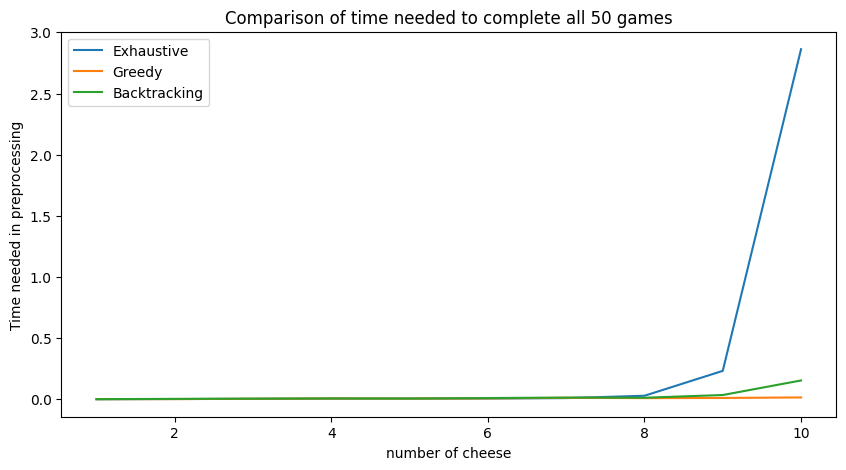

In [23]:
# Visualization time needed by palyers as a function of the number of cheese
max_times = max([max(results[player]) for player in results])
pyplot.figure(figsize=(10, 5))
for player in results:
    times = results[player]
    pyplot.plot(Nb_Cheese,times, label=player)
pyplot.title("Comparison of time needed to complete all %d games" % (NB_GAMES))
pyplot.xlabel("number of cheese")
pyplot.ylabel("Time needed in preprocessing")
pyplot.legend()
pyplot.show()

As anticipated, the `Exhaustive` player requires more preprocessing time compared to both the `Backtracking` player and the `Greedy` player.\
Conversely, the `Greedy` player takes the least amount of time among all three players.